<a href="https://colab.research.google.com/github/Shubham-Patel22/Customer-Analysis/blob/main/My_Customer_Purchase_Behavior_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis

##Problem Statement

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
# Importing needed libraries
# For data loading and wrangling
import pandas as pd
import numpy as np

# For statistical functionality
import scipy.stats as stats

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt

# For date-time functionalities
import datetime

In [ ]:
# Importing the data
path = '/content/Superstore Marketing Data - Sheet1.csv'
superstore_data = pd.read_csv(path)

###**Basic Data Exploration**

In [ ]:
superstore_data.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [ ]:
superstore_data.shape

(2240, 22)

In [ ]:
superstore_data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
superstore_data.isna().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
superstore_data.duplicated().sum()

0

###**Handling missing data and giving sensible datatypes to columns**

In [ ]:
# Handling missing values in Income with median imputation.
superstore_data['Income'].fillna(superstore_data['Income'].median(), inplace=True)

<ipython-input-11-1091ea16e65f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  superstore_data['Income'].fillna(superstore_data['Income'].median(), inplace=True)


In [ ]:
# Changing the datatype of Income to int as all salaries are mostly in int and 2 pennies after a dollar bill don't make any difference.
superstore_data['Income'] = superstore_data['Income'].astype(int)

In [ ]:
# Changing Dt_Customer to dates in the dataframe.
# errors='coerce'. This is there so that whereever date is not present, i.e. '########' is converted to NaT (Not a Time), a null value.
superstore_data['Dt_Customer'] = pd.to_datetime(superstore_data['Dt_Customer'],  errors = 'coerce')

In [ ]:
# Handling missing values in Dt_Customer with median imputation.
superstore_data['Dt_Customer'].fillna(superstore_data['Dt_Customer'].median(), inplace=True)

<ipython-input-14-47091f72e4bf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  superstore_data['Dt_Customer'].fillna(superstore_data['Dt_Customer'].median(), inplace=True)


In [ ]:
# Retain only date component in Dt_Customer
superstore_data['Dt_Customer'] = superstore_data['Dt_Customer'].dt.date

In [ ]:
superstore_data['Dt_Customer'] = pd.to_datetime(superstore_data['Dt_Customer'])

In [ ]:
superstore_data['Dt_Customer'].mode()

,Dt_Customer
0,2013-07-21


###**Summary of basic statistics for relevant numerical variables**

In [ ]:
superstore_data.describe().drop(columns = ['Id', 'Kidhome', 'Teenhome', 'Response', 'Complain', 'Year_Birth'])

,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.970089,2013-07-20 00:57:12.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
min,1730.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,2013-05-24 18:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,51381.000000,2013-07-21 00:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,68289.750000,2013-09-16 00:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,666666.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000
std,25037.956074,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645


###**Customer Demographics**


####Age

In [ ]:
superstore_data['Age'] = datetime.datetime.now().year - superstore_data['Year_Birth']

<Axes: xlabel='Age', ylabel='Count'>

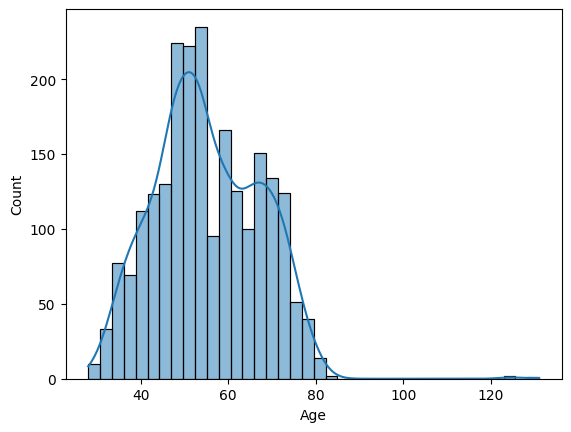

In [ ]:
sns.histplot(superstore_data['Age'], kde = True)

Minimum age

In [ ]:
superstore_data['Age'].min()

28

Maximum age

In [ ]:
superstore_data['Age'].max()

131

####Customer relation period

The amount of time a customer has been a customer. I will measure it in days. I will define a variable for this using customer joining date.

In [ ]:
superstore_data['relation_period'] = (datetime.datetime.now() - pd.to_datetime(superstore_data['Dt_Customer'])).dt.days

<Axes: xlabel='relation_period', ylabel='Count'>

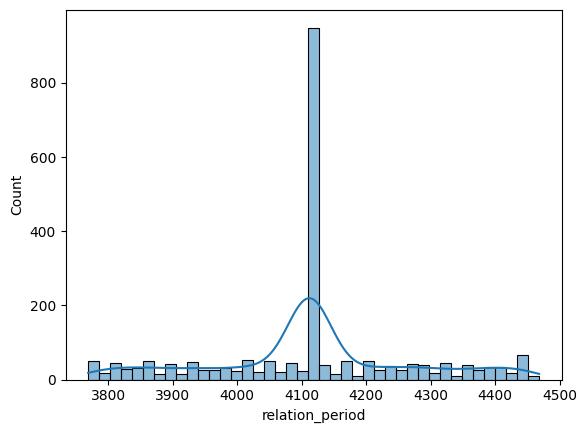

In [ ]:
sns.histplot(superstore_data['relation_period'], kde = True)

In [ ]:
superstore_data['relation_period'].isna().sum()

0

In [ ]:
min(superstore_data['relation_period'])

3769

In [ ]:
max(superstore_data['relation_period'])

4468

####Education

In [ ]:
superstore_data['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [ ]:
#2n cycle is another term for master. So tweaking data to make it more consistent.
superstore_data['Education'].replace('2n Cycle', 'Master', inplace=True)

<ipython-input-29-42e313a7a1af>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  superstore_data['Education'].replace('2n Cycle', 'Master', inplace=True)


<Axes: xlabel='Education', ylabel='count'>

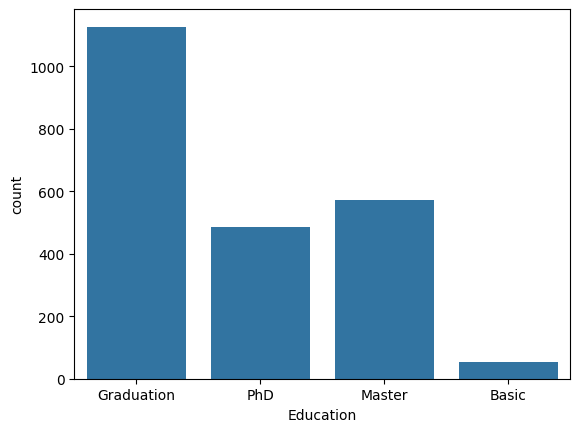

In [ ]:
sns.countplot(x = 'Education', data = superstore_data)

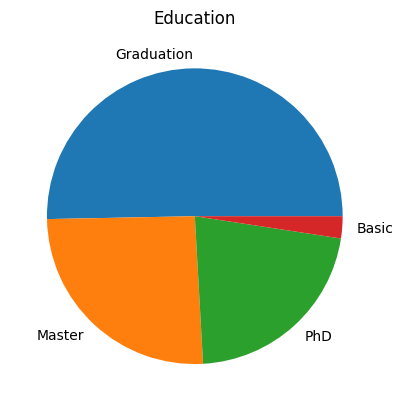

In [ ]:
plt.pie(x = superstore_data['Education'].value_counts(), labels = superstore_data['Education'].value_counts().index)
plt.title('Education')
plt.show()

####Marital Status

In [ ]:
superstore_data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
YOLO,2
Absurd,2


In [ ]:
# Doing some changes for making data consistent.
superstore_data['Marital_Status'].replace('Alone', 'Single', inplace=True)
# YOLO is used to express the idea of doing something spontaneous or risky, without worrying about the consequences. You can only go YOLO if you are single.
superstore_data['Marital_Status'].replace('YOLO', 'Single', inplace=True)
# absurd marital_status can be someone saying he/she is married to a non-human entity or a fictional character, which in reality means they are just single coping.
superstore_data['Marital_Status'].replace('Absurd', 'Single', inplace=True)

<ipython-input-33-3a1fb010df3e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  superstore_data['Marital_Status'].replace('Alone', 'Single', inplace=True)
<ipython-input-33-3a1fb010df3e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

<Axes: xlabel='Marital_Status', ylabel='count'>

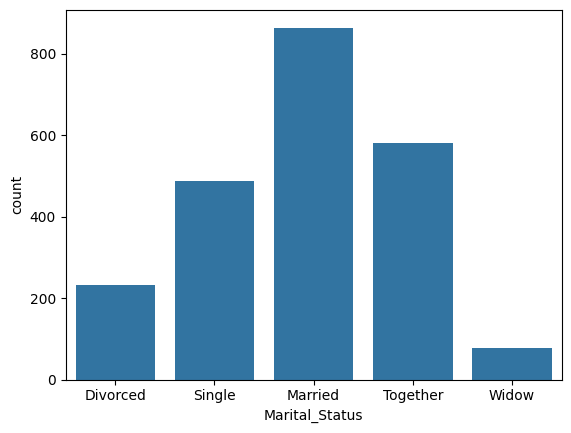

In [ ]:
sns.countplot(x = 'Marital_Status', data = superstore_data)

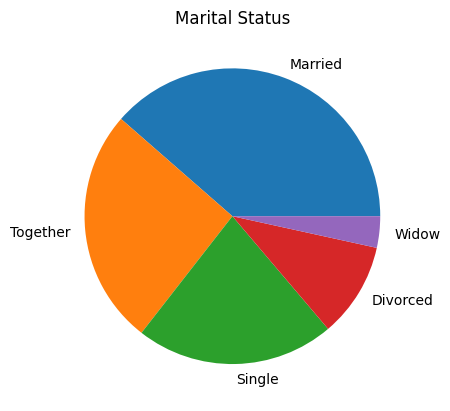

In [ ]:
plt.pie(x = superstore_data['Marital_Status'].value_counts(), labels = superstore_data['Marital_Status'].value_counts().index)
plt.title('Marital Status')
plt.show()

####Parental Status

In [ ]:
superstore_data.Kidhome.value_counts()

,count
Kidhome,
0,1293
1,899
2,48


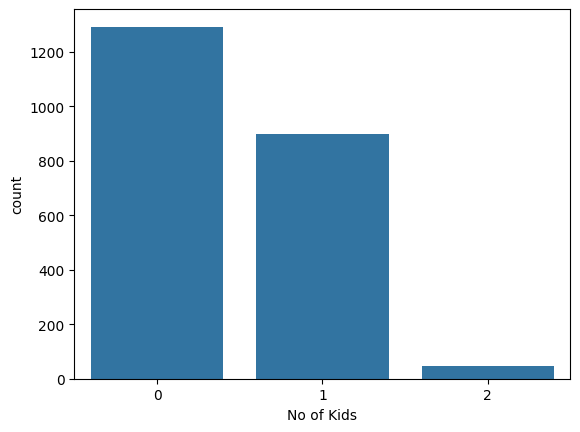

In [ ]:
plt.xlabel('No of Kids')
sns.countplot(x = 'Kidhome', data = superstore_data)
plt.show()

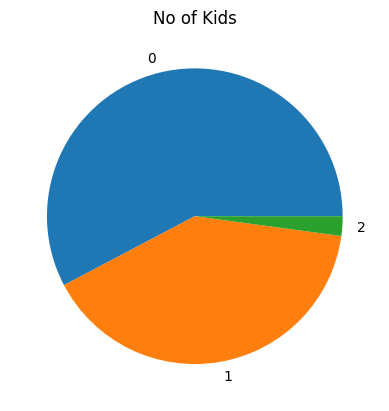

In [ ]:
plt.pie(x = superstore_data['Kidhome'].value_counts(), labels = superstore_data['Kidhome'].value_counts().index)
plt.title('No of Kids')
plt.show()

In [ ]:
superstore_data.Teenhome.value_counts()

,count
Teenhome,
0,1158
1,1030
2,52


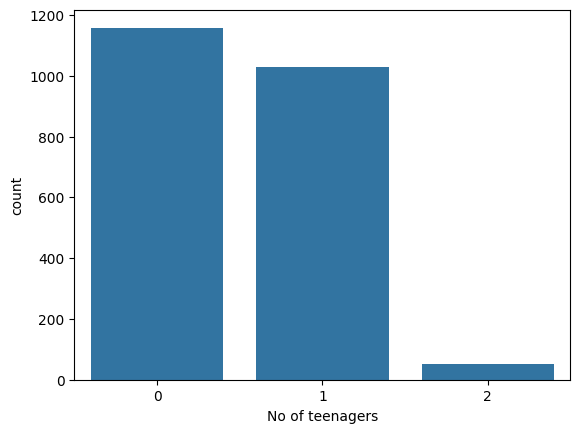

In [ ]:
plt.xlabel('No of teenagers')
sns.countplot(x = 'Teenhome', data = superstore_data)
plt.show()

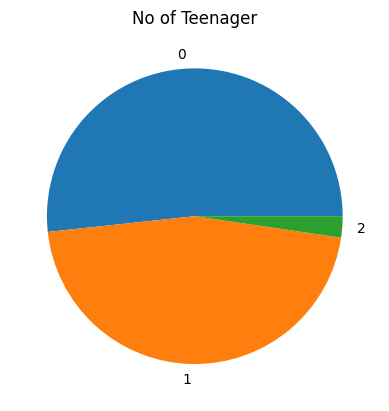

In [ ]:
plt.pie(x = superstore_data['Teenhome'].value_counts(), labels = superstore_data['Teenhome'].value_counts().index)
plt.title('No of Teenager')
plt.show()

In [ ]:
superstore_data['no_of_children'] = superstore_data['Kidhome'] + superstore_data['Teenhome']

In [ ]:
superstore_data['no_of_children'].value_counts()

,count
no_of_children,
1,1128
0,638
2,421
3,53


<Axes: xlabel='no_of_children', ylabel='count'>

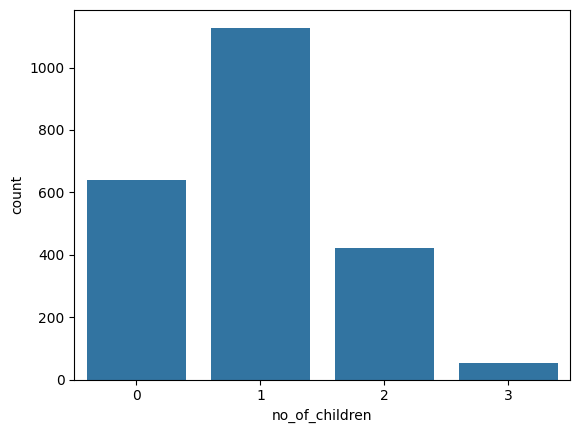

In [ ]:
sns.countplot(x = 'no_of_children', data = superstore_data)

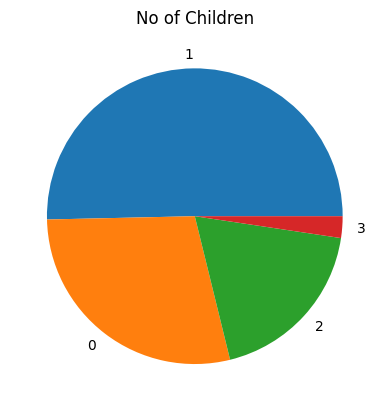

In [ ]:
plt.pie(x = superstore_data['no_of_children'].value_counts(), labels = superstore_data['no_of_children'].value_counts().index)
plt.title('No of Children')
plt.show()

In [ ]:
superstore_data.loc[:,['Kidhome', 'Teenhome']].value_counts()

Kidhome  Teenhome
0        0           638
         1           625
1        0           503
         1           374
2        1            31
0        2            30
1        2            22
2        0            17
Name: count, dtype: int64

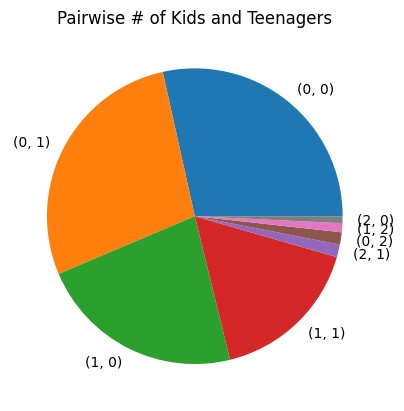

In [ ]:
plt.pie(x = superstore_data.loc[:,['Kidhome', 'Teenhome']].value_counts(), labels = superstore_data.loc[:,['Kidhome', 'Teenhome']].value_counts().index)
plt.title('Pairwise # of Kids and Teenagers')
plt.show()

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

### *Descriptive Statistics*

In [ ]:
superstore_data.describe().drop(columns = ['Id', 'Kidhome', 'Teenhome', 'Response', 'Complain', 'Year_Birth', 'no_of_children'])

,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,relation_period
count,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.970089,2013-07-20 00:57:12.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,55.194196,4112.960268
min,1730.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,3769.000000
25%,35538.750000,2013-05-24 18:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,47.000000,4055.000000
50%,51381.000000,2013-07-21 00:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,54.000000,4112.000000
75%,68289.750000,2013-09-16 00:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,65.000000,4169.250000
max,666666.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,131.000000,4468.000000
std,25037.956074,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,11.984069,155.450745


In [ ]:
key_columns = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Age', 'relation_period', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases',
                                           'NumWebVisitsMonth']

Mode of key variables

In [ ]:
superstore_data[key_columns].mode()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,relation_period,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth
0,51381,56,2,0,7,0,0,1,48,4112,1,0,3,2,7


Median of key variables

In [ ]:
superstore_data[key_columns].median()

,0
Income,51381.0
Recency,49.0
MntWines,173.5
MntFruits,8.0
MntMeatProducts,67.0
MntFishProducts,12.0
MntSweetProducts,8.0
MntGoldProds,24.0
Age,54.0
relation_period,4112.0


Variance of key variables

In [ ]:
superstore_data[key_columns].var()

,0
Income,6.268992e+08
Recency,8.388237e+02
MntWines,1.132978e+05
MntFruits,1.581926e+03
MntMeatProducts,5.094743e+04
MntFishProducts,2.984325e+03
MntSweetProducts,1.704080e+03
MntGoldProds,2.721442e+03
Age,1.436179e+02
relation_period,2.416493e+04


### *Handling Outliers*

#### <u>Age</u>

<Axes: xlabel='Age', ylabel='Count'>

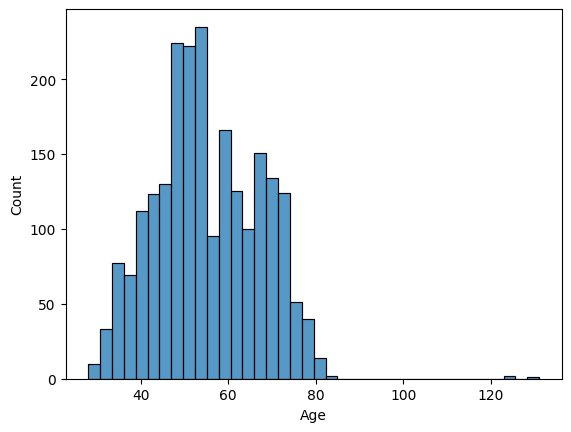

In [ ]:
sns.histplot(superstore_data['Age'])

Outliers in Age

Here from the above graph it is clear that we can consider any age above 100 as outlier.

In [ ]:
superstore_data.loc[(superstore_data['Age'] >= 100), 'Age'].value_counts()

,count
Age,
131,1
125,1
124,1


Eliminating outliers in age.

In [ ]:
superstore_data = superstore_data.loc[(superstore_data['Age'] < 100)]

#### <u>Customer Relation Period</u>

The amount of time a customer has been a customer measured in days.

<Axes: xlabel='relation_period', ylabel='Count'>

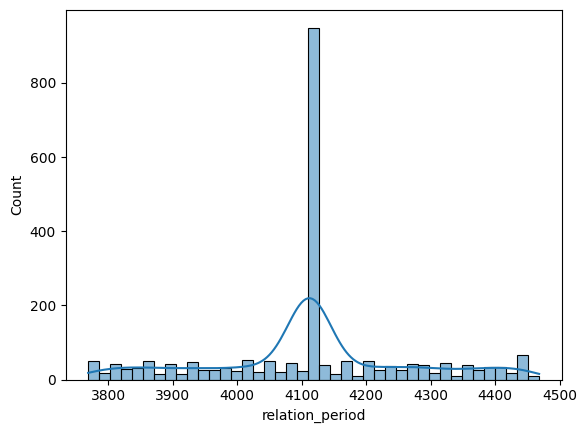

In [ ]:
sns.histplot(superstore_data['relation_period'], kde = True)

<Axes: xlabel='relation_period'>

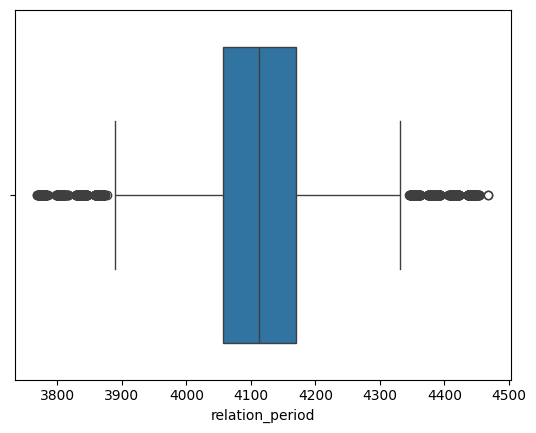

In [ ]:
sns.boxplot(x = superstore_data['relation_period'])

Outliers in Customer Relation Period

There are no considerable outliers.

#### <u>Income</u>

<Axes: xlabel='Income'>

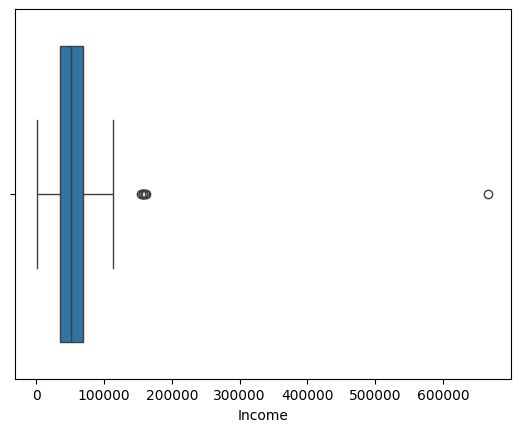

In [ ]:
sns.boxplot(x = superstore_data['Income'])

<Axes: xlabel='Income', ylabel='Count'>

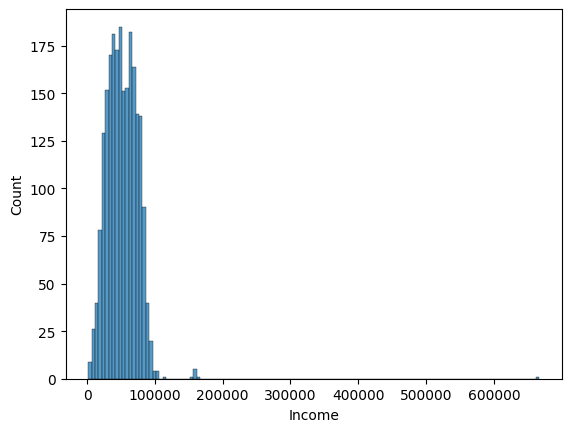

In [ ]:
sns.histplot(superstore_data['Income'])

Outliers in Income

From above graphs, we can consider any income above $100000 as outlier.

In [ ]:
superstore_data.loc[(superstore_data['Income'] > 100000), 'Income'].value_counts()

,count
Income,
102692,1
113734,1
157146,1
160803,1
666666,1
162397,1
105471,1
157733,1
102160,1


In [ ]:
superstore_data.loc[(superstore_data['Income'] > 100000), 'Income'].value_counts().sum()

13

Eliminating outliers in Income.

In [ ]:
superstore_data = superstore_data.loc[(superstore_data['Income'] <= 100000)]

#### <u>Recency</u>

<Axes: xlabel='Recency'>

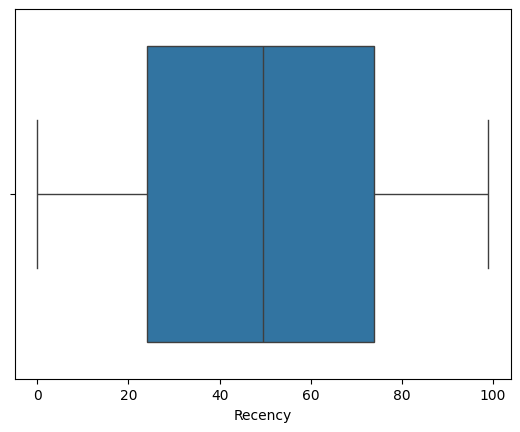

In [ ]:
sns.boxplot(x = superstore_data['Recency'])

<Axes: xlabel='Recency', ylabel='Count'>

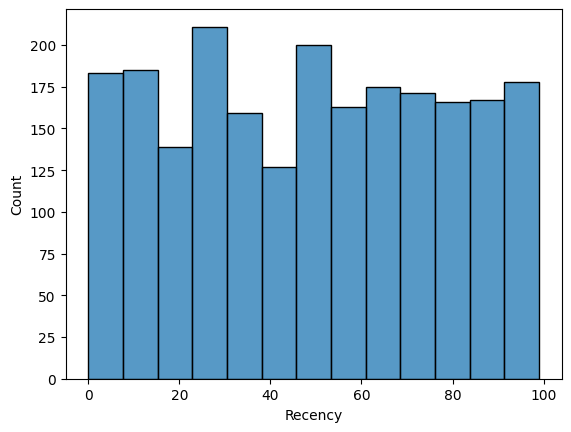

In [ ]:
sns.histplot(superstore_data['Recency'])

There are no outliers in Recency.

#### <u>MntWines</u>

The amount spent on wines.

<Axes: xlabel='MntWines', ylabel='Count'>

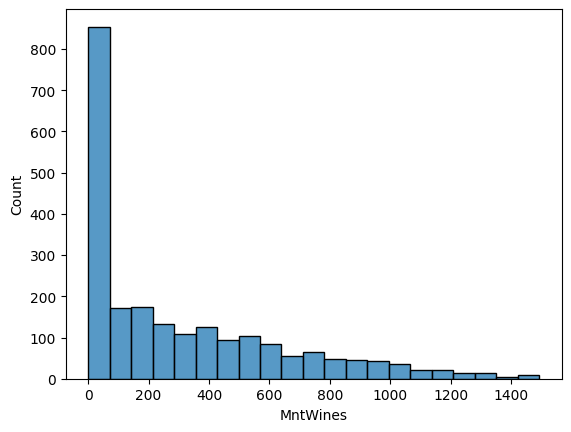

In [ ]:
sns.histplot(superstore_data['MntWines'])

<Axes: xlabel='MntWines'>

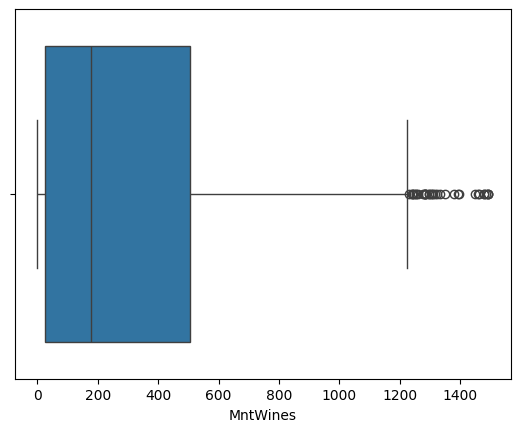

In [ ]:
sns.boxplot(x = superstore_data['MntWines'])

Outliers in MntWines

From the above plots we can consider 1400 to be a save cutoff for outliers.

In [ ]:
superstore_data.loc[(superstore_data['MntWines'] > 1400), 'MntWines'].value_counts()

,count
MntWines,
1478,2
1492,2
1462,1
1493,1
1486,1
1459,1
1449,1


In [ ]:
superstore_data.loc[(superstore_data['MntWines'] > 1400), 'MntWines'].value_counts().sum()

9

Eliminating outliers.

In [ ]:
superstore_data = superstore_data.loc[(superstore_data['MntWines'] <= 1400)]

#### <u>MntFruits</u>

The amount spent on fruits.

<Axes: xlabel='MntFruits'>

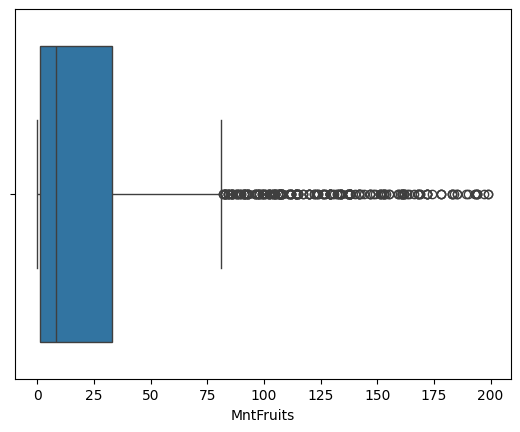

In [ ]:
sns.boxplot(x = superstore_data['MntFruits'])

<Axes: xlabel='MntFruits', ylabel='Count'>

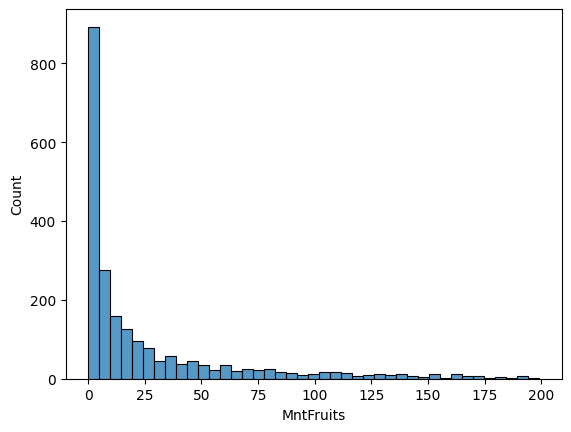

In [ ]:
sns.histplot(superstore_data['MntFruits'])

Outliers in MntFruits

There are no considerable outliers.

#### <u>MntMeatProducts</u>

The amount spent on meat products.

<Axes: xlabel='MntMeatProducts', ylabel='Count'>

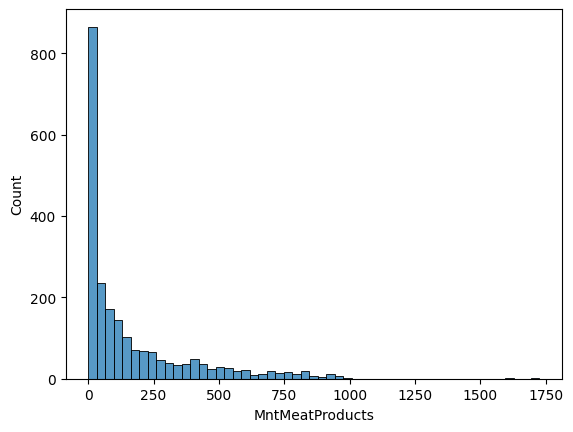

In [ ]:
sns.histplot(superstore_data['MntMeatProducts'])

<Axes: xlabel='MntMeatProducts'>

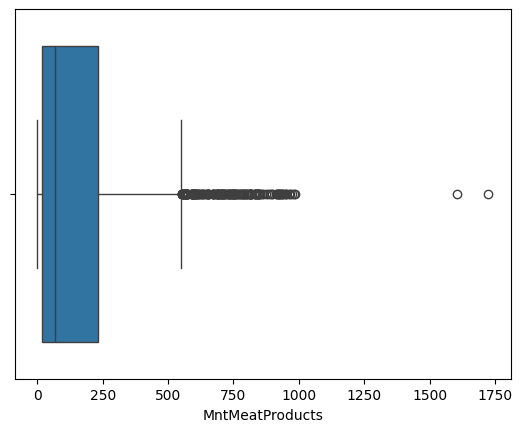

In [ ]:
sns.boxplot(x = superstore_data['MntMeatProducts'])

Outliers in MntMeatProducts

From above graphs, we can consider 1000 to be a save cutoff for outliers.

In [ ]:
superstore_data.loc[(superstore_data['MntMeatProducts'] > 1000), 'MntMeatProducts'].value_counts()

,count
MntMeatProducts,
1725,1
1607,1


In [ ]:
superstore_data.loc[(superstore_data['MntMeatProducts'] > 1000), 'MntMeatProducts'].value_counts().sum()

2

Eliminating outliers.

In [ ]:
superstore_data = superstore_data.loc[(superstore_data['MntMeatProducts'] <= 1000)]

#### <u>MntFishProducts</u>

The amount spent on fish products.

<Axes: xlabel='MntFishProducts'>

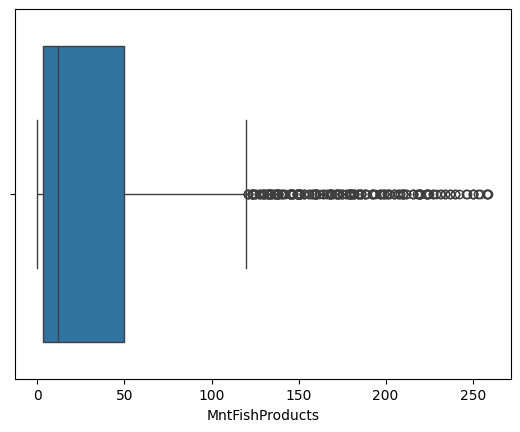

In [ ]:
sns.boxplot(x = superstore_data['MntFishProducts'])

<Axes: xlabel='MntFishProducts', ylabel='Count'>

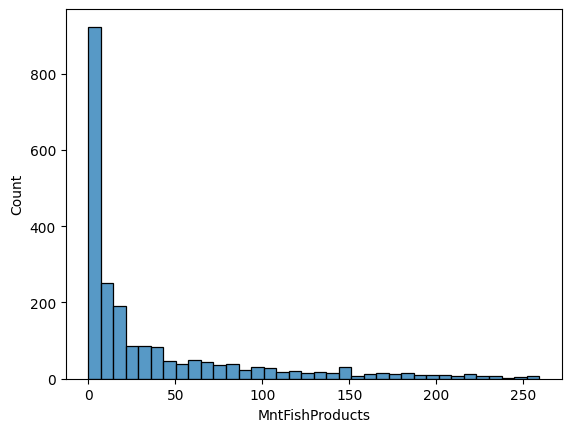

In [ ]:
sns.histplot(superstore_data['MntFishProducts'])

Outliers in MntFishProducts

From above graphs, there are no considerable outliers.

#### <u>MntSweetProducts</u>

The amount spent on sweet products.

<Axes: xlabel='MntSweetProducts'>

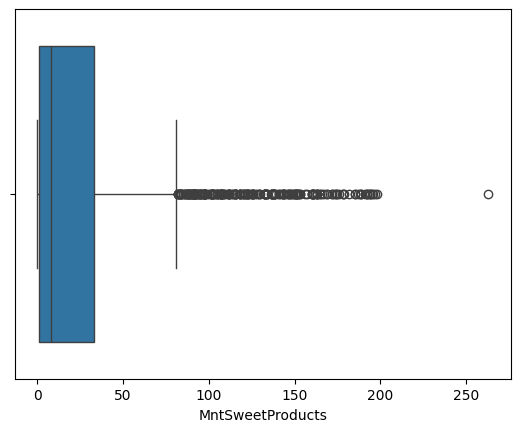

In [ ]:
sns.boxplot(x = superstore_data['MntSweetProducts'])

<Axes: xlabel='MntSweetProducts', ylabel='Count'>

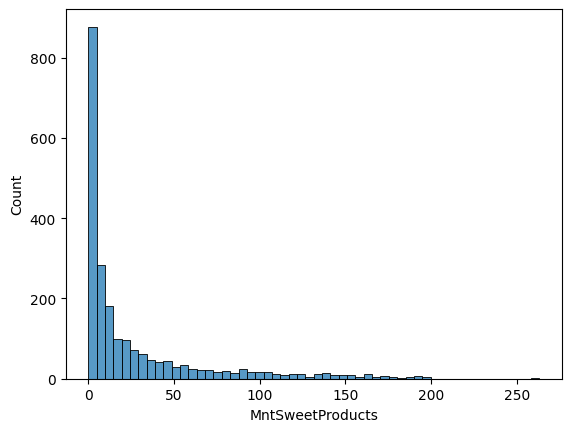

In [ ]:
sns.histplot(superstore_data['MntSweetProducts'])

Outliers in MntSweetProducts

From above graphs, we can consider 200 as a sensible cutoff point for outlier points.

In [ ]:
superstore_data.loc[(superstore_data['MntSweetProducts'] > 200), 'MntSweetProducts'].value_counts()

,count
MntSweetProducts,
263,1


Eliminating outliers.

In [ ]:
superstore_data = superstore_data.loc[(superstore_data['MntSweetProducts'] <= 200)]

#### <u>MntGoldProds</u>

The amount spent on gold products.

<Axes: xlabel='MntGoldProds', ylabel='Count'>

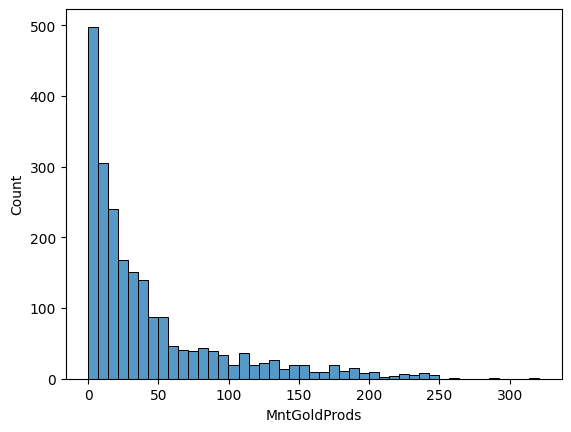

In [ ]:
sns.histplot(superstore_data['MntGoldProds'])

<Axes: xlabel='MntGoldProds'>

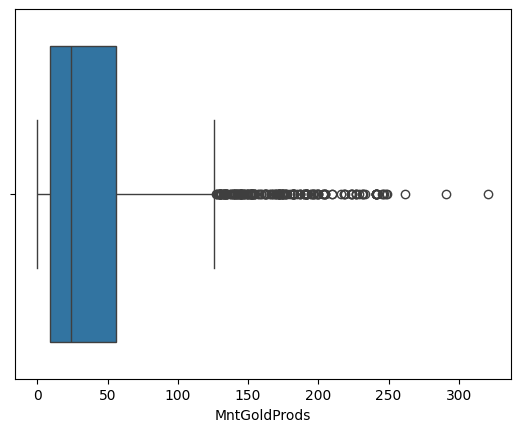

In [ ]:
sns.boxplot(x = superstore_data['MntGoldProds'])

Outliers in MntGoldProds

From above graphs, we can savely consider all values above 250 as outliers.

In [ ]:
superstore_data.loc[(superstore_data['MntGoldProds'] > 250), 'MntGoldProds'].value_counts()

,count
MntGoldProds,
321,1
262,1
291,1


Eliminating outliers.

In [ ]:
superstore_data = superstore_data.loc[(superstore_data['MntGoldProds'] <= 250)]

####<u>NumDealsPurchases</u>

number of purchases made with discount.

<Axes: xlabel='NumDealsPurchases', ylabel='count'>

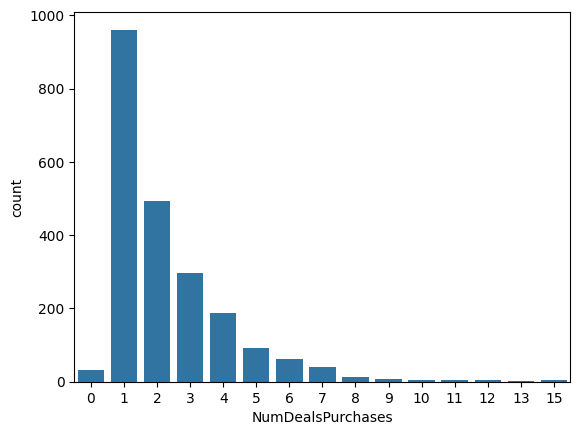

In [ ]:
sns.countplot(x = superstore_data['NumDealsPurchases'])

<Axes: xlabel='NumDealsPurchases'>

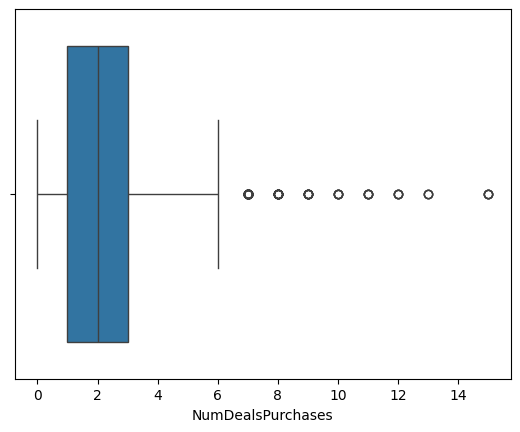

In [ ]:
sns.boxplot(x = superstore_data['NumDealsPurchases'])

Outliers in NumDealsPurchases

All values above 6 are outliers. We will not eliminate them but rather retain them.

In [ ]:
superstore_data.loc[(superstore_data['NumDealsPurchases'] > 6), 'NumDealsPurchases'].value_counts()

,count
NumDealsPurchases,
7,40
8,14
9,8
11,5
10,5
12,4
15,4
13,3


In [ ]:
superstore_data.loc[(superstore_data['NumDealsPurchases'] > 6), 'NumDealsPurchases'].value_counts().sum()

83

#### <u>NumCatalogPurchases</u>

Number of purchases made using catalog (buying goods to be shipped through the mail)

<Axes: xlabel='NumCatalogPurchases', ylabel='count'>

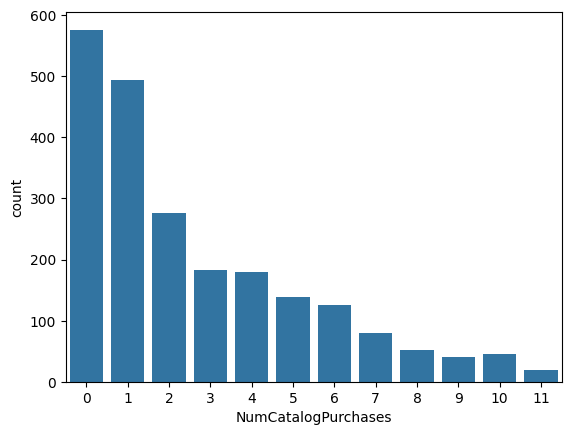

In [ ]:
sns.countplot(x = superstore_data['NumCatalogPurchases'])

<Axes: xlabel='NumCatalogPurchases'>

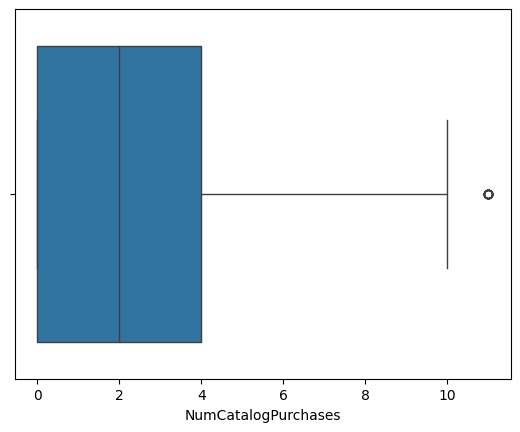

In [ ]:
sns.boxplot(x = superstore_data['NumCatalogPurchases'])

Outliers in NumCatalogPurchases

We have only one outlier that is 11. We will be retaining this outlier.

In [ ]:
superstore_data.loc[(superstore_data['NumCatalogPurchases'] == 11), 'NumCatalogPurchases'].value_counts()

,count
NumCatalogPurchases,
11,19


#### <u>NumStorePurchases</u>

Number of purchases made directly in stores

<Axes: xlabel='NumStorePurchases', ylabel='count'>

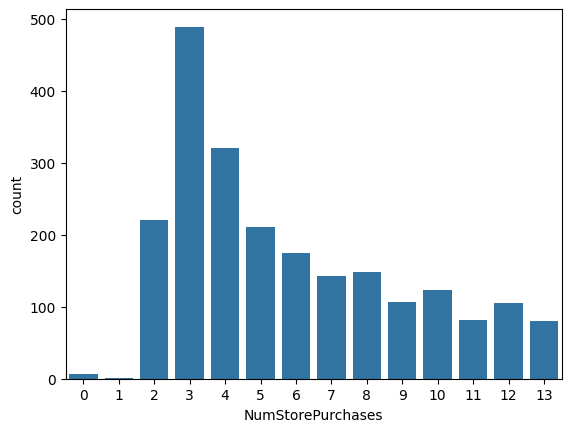

In [ ]:
sns.countplot(x = superstore_data['NumStorePurchases'])

<Axes: xlabel='NumStorePurchases'>

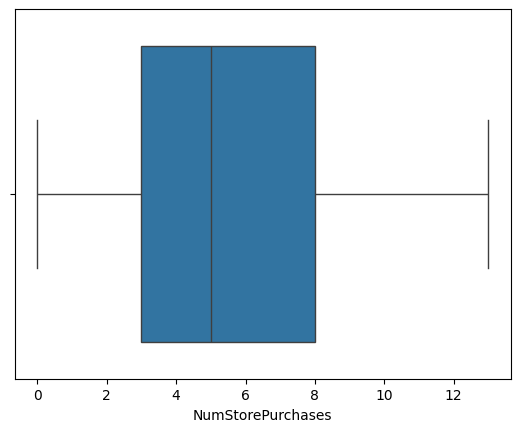

In [ ]:
sns.boxplot(x = superstore_data['NumStorePurchases'])

Outliers in NumStorePurchases

There are no outliers.

#### <u>NumWebPurchases</u>

Number of purchases made through the company's website

<Axes: xlabel='NumWebPurchases', ylabel='count'>

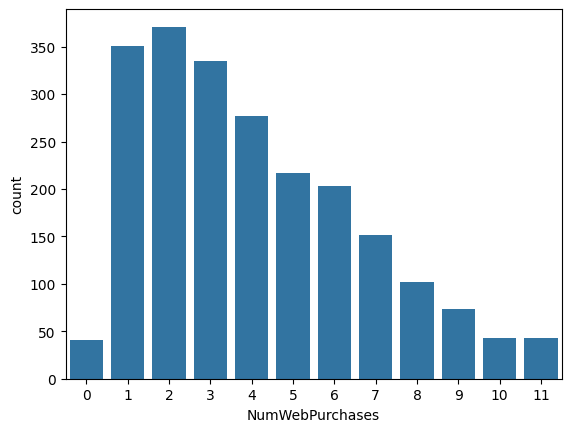

In [ ]:
sns.countplot(x = superstore_data['NumWebPurchases'])

<Axes: xlabel='NumWebPurchases'>

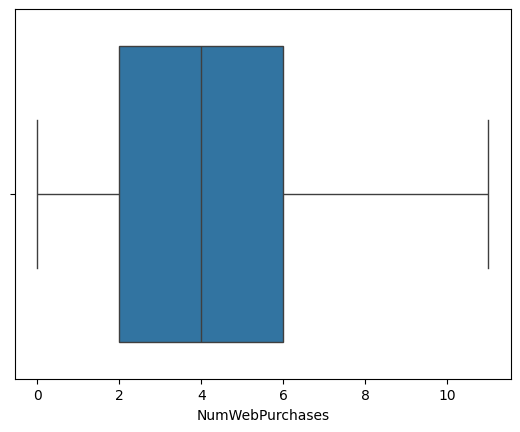

In [ ]:
sns.boxplot(x = superstore_data['NumWebPurchases'])

Outliers in NumWebPurchases

There are no outliers.

#### <u>NumWebVisitsMonth</u>

Number of visits to company's website in the last month

<Axes: xlabel='NumWebVisitsMonth', ylabel='count'>

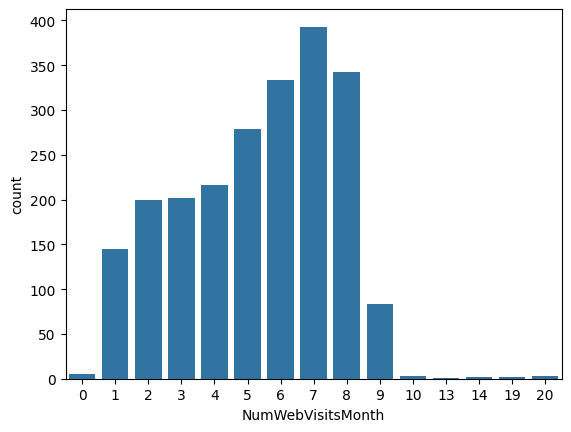

In [ ]:
sns.countplot(x = superstore_data['NumWebVisitsMonth'])

<Axes: xlabel='NumWebVisitsMonth'>

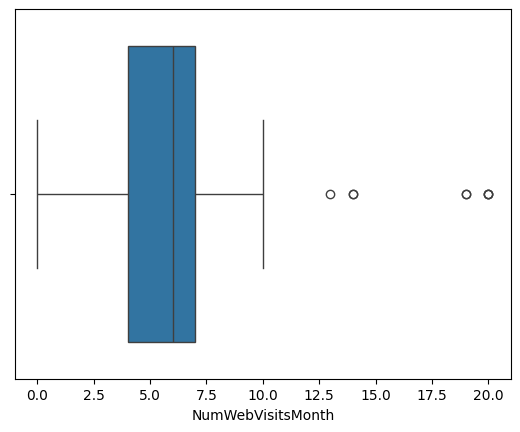

In [ ]:
sns.boxplot(x = superstore_data['NumWebVisitsMonth'])

Outliers in NumWebVisitsMonth

All values above 10 are outliers. We will be retaining these outliers.

In [ ]:
superstore_data.loc[(superstore_data['NumWebVisitsMonth'] > 10), 'NumWebVisitsMonth'].value_counts()

,count
NumWebVisitsMonth,
20,3
14,2
19,2
13,1


In [ ]:
superstore_data.loc[(superstore_data['NumWebVisitsMonth'] > 10), 'NumWebVisitsMonth'].value_counts().sum()

8

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

###*Age*

<Axes: xlabel='Age', ylabel='Count'>

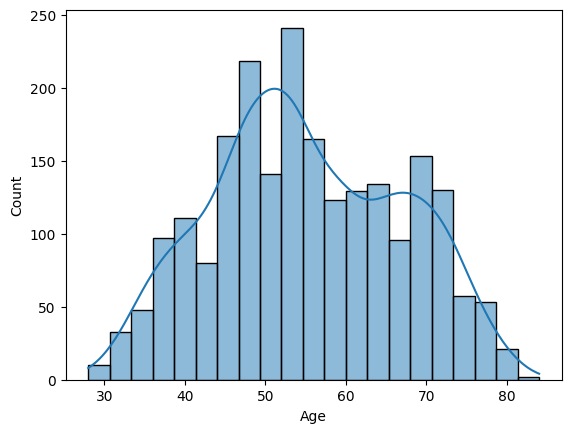

In [ ]:
sns.histplot(superstore_data['Age'], kde = True)

Looks like normal distribution can be a good fit. In Normal distribution, there are 2 parameters mean and standard deviation.

In [ ]:
age_dist = stats.norm.fit(superstore_data['Age'])
print(f"The parameters are {age_dist}")

The parameters are (55.11996378451788, 11.704201162469953)


In [ ]:
print(f"The expected value of age is {round(age_dist[0], 0)}")

The expected value of age is 55.0


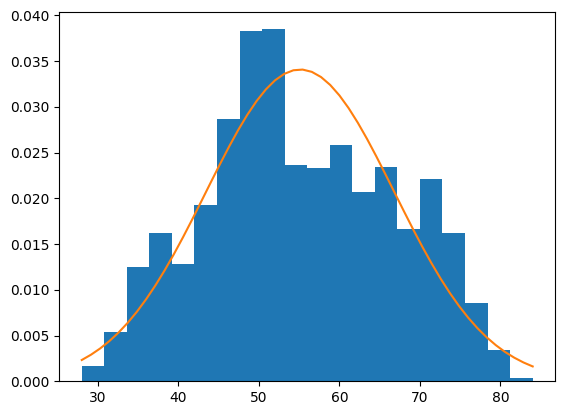

In [ ]:
x = np.linspace(min(superstore_data['Age']), max(superstore_data['Age']))
plt.hist(superstore_data['Age'], bins = 20, density = True)
plt.plot(x, stats.norm.pdf(x, *age_dist))
plt.show()

### *Customer Relation Period*

The amount of time a customer has been a customer measured in days.

<Axes: xlabel='relation_period', ylabel='Count'>

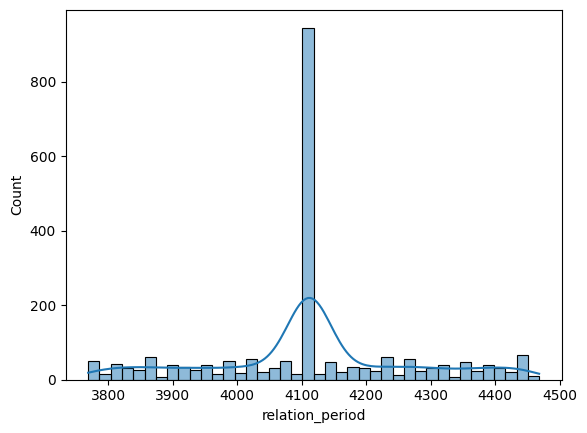

In [ ]:
sns.histplot(superstore_data['relation_period'], kde = True)

The normal distribution is perfect for this.

In [ ]:
relation_period_dist = stats.norm.fit(superstore_data['relation_period'])
print(f"The parameters are {relation_period_dist}")

The parameters are (4112.981892258941, 155.98404939245108)


In [ ]:
print(f"The expected value of customer relation period is {round(relation_period_dist[0], 0)}")

The expected value of customer relation period is 4113.0


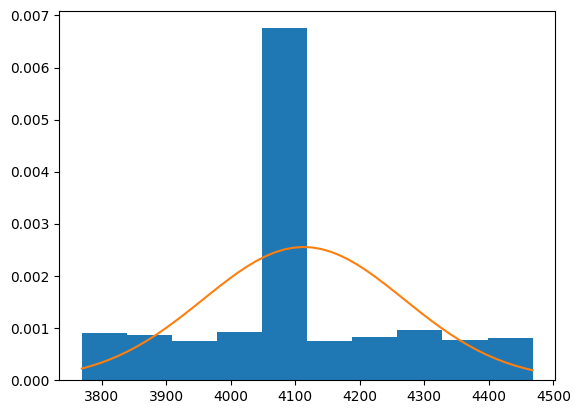

In [ ]:
x = np.linspace(min(superstore_data['relation_period']), max(superstore_data['relation_period']))
plt.hist(superstore_data['relation_period'], bins = 10, density = True)
plt.plot(x, stats.norm.pdf(x, *relation_period_dist))
plt.show()

###*Income*

<Axes: xlabel='Income', ylabel='Count'>

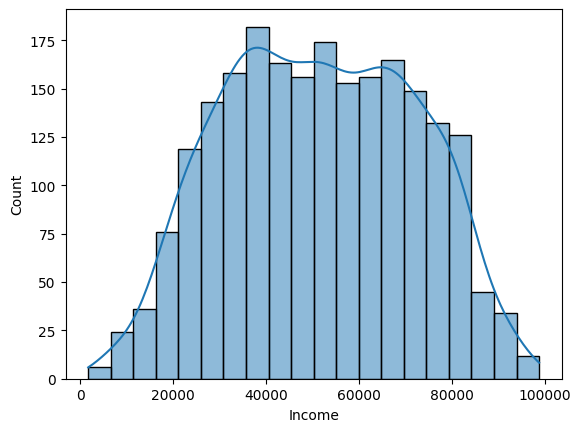

In [ ]:
sns.histplot(superstore_data['Income'], kde = True)

Again, we can see that the normal distribution seems a perfect fit.

In [ ]:
income_dist = stats.norm.fit(superstore_data['Income'])
print(f"The parameters are {income_dist}")

The parameters are (51467.41421457673, 20349.42242406911)


In [ ]:
print(f"The expected income is {round(income_dist[0], 2)}")

The expected income is 51467.41


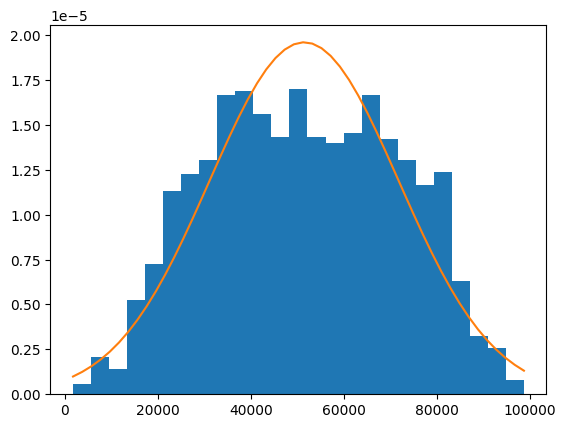

In [ ]:
x = np.linspace(min(superstore_data['Income']), max(superstore_data['Income']))
plt.hist(superstore_data['Income'], bins = 25, density = True)
plt.plot(x, stats.norm.pdf(x, *income_dist))
plt.show()

###*Recency*

<Axes: xlabel='Recency', ylabel='Count'>

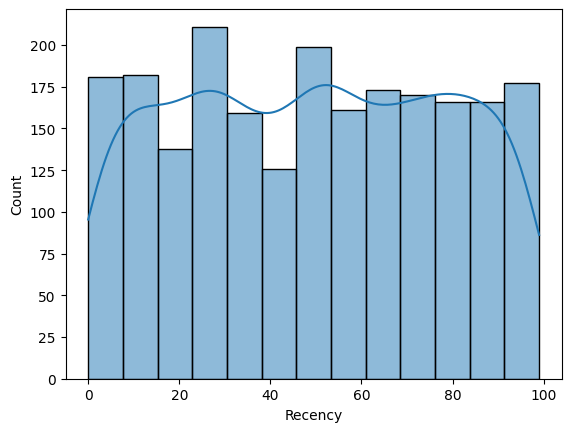

In [ ]:
sns.histplot(superstore_data['Recency'], kde = True)

This is definitely not normal distribution. It looks like that Uniform distribution will be closest fit. In Uniform distribution, there are 2 parameters minimum and maximum. You actually don't need scipy.stats to calculate it but having it makes the later plotting work to show the fit easier.

In [ ]:
recency_dist = stats.uniform.fit(superstore_data['Recency'])
print(f"The parameters are {recency_dist}")

The parameters are (0.0, 99.0)


In [ ]:
min(superstore_data['Recency'])

0

In [ ]:
max(superstore_data['Recency'])

99

In [ ]:
expected_recency = (min(superstore_data['Recency']) + max(superstore_data['Recency']))/2
print(f"The expected recency is {round(expected_recency, 0)}")

The expected recency is 50.0


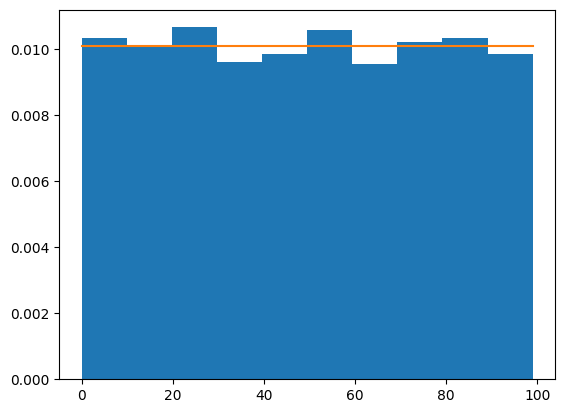

In [ ]:
x = np.linspace(min(superstore_data['Recency']), max(superstore_data['Recency']))
plt.hist(superstore_data['Recency'], bins = 10, density = True)
plt.plot(x, stats.uniform.pdf(x, *recency_dist))
plt.show()

###*MntGoldProds*

The amount spent on gold products.

<Axes: xlabel='MntGoldProds', ylabel='Count'>

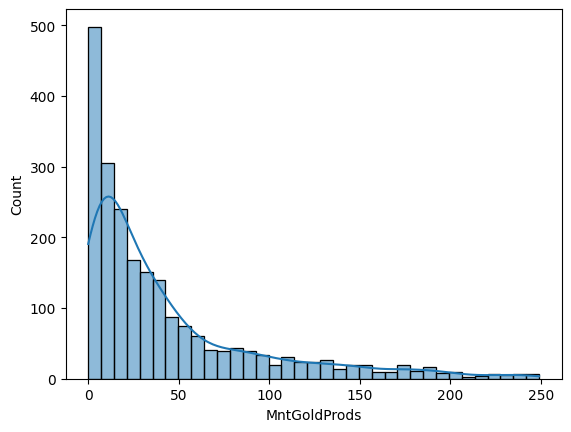

In [ ]:
sns.histplot(superstore_data['MntGoldProds'], kde = True)

Exponential distribution seems like a perfect fit. Exponential distribution has only one parameter lambda which can be determined through mean. As we have,

lambda = 1 / mean

So, either you can specify lambda or mean as a parameter for exponential distribution. Scipy library choses to provide mean in the second value of tuple and loc is provided in 1st value which is returned as 0, which means the function will start at 0.

In [ ]:
goldist = stats.expon.fit(superstore_data['MntGoldProds'])
print(f"The parameters are {goldist}")

The parameters are (0.0, 43.32684472612041)


In [ ]:
print(f"The expected expenditure on Gold products is {round(goldist[1], 2)}")

The expected expenditure on Gold products is 43.33


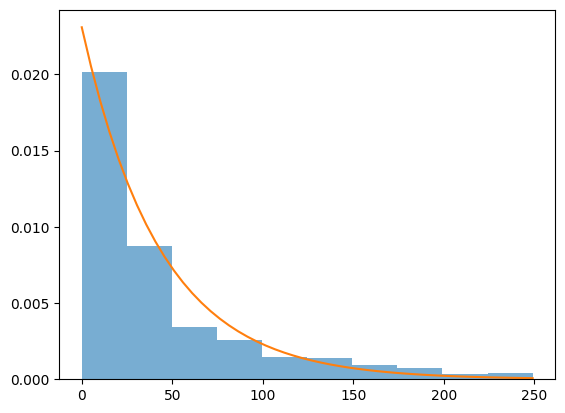

In [ ]:
x = np.linspace(min(superstore_data['MntGoldProds']), max(superstore_data['MntGoldProds']))
plt.hist(superstore_data['MntGoldProds'], bins = 10, density = True, alpha = 0.6)
plt.plot(x, stats.expon.pdf(x, *goldist))
plt.show()

###*MntWines*

The amount spent on wines.

<Axes: xlabel='MntWines', ylabel='Count'>

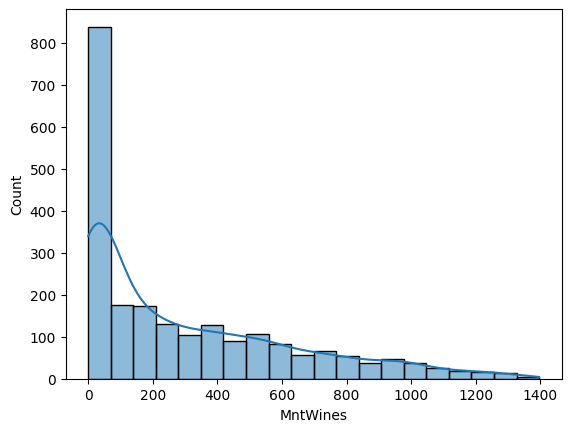

In [ ]:
sns.histplot(superstore_data['MntWines'], kde = True)

The Exponential distribution looks perfect on this data.

In [ ]:
wines_dist = stats.expon.fit(superstore_data['MntWines'])
print(f"The parameters are {wines_dist}")

The parameters are (0.0, 300.43775464010866)


In [ ]:
print(f"The expected expenditure on wines is {round(wines_dist[1], 2)}")

The expected expenditure on wines is 300.44


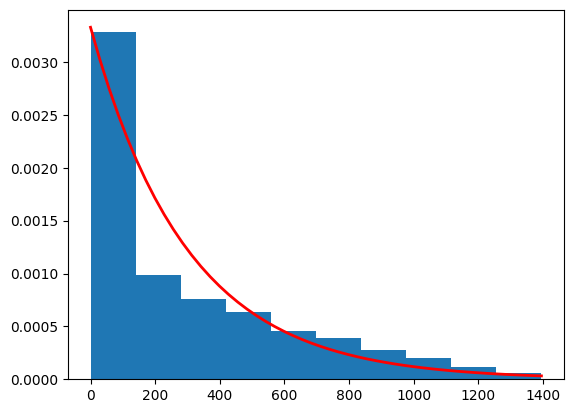

In [ ]:
x = np.linspace(min(superstore_data['MntWines']), max(superstore_data['MntWines']))
plt.hist(superstore_data['MntWines'], bins = 10, density = True)
plt.plot(x, stats.expon.pdf(x, *wines_dist), 'r-', lw = 2)
plt.show()

###*MntFruits*

The amount spent on fruits.

<Axes: xlabel='MntFruits', ylabel='Count'>

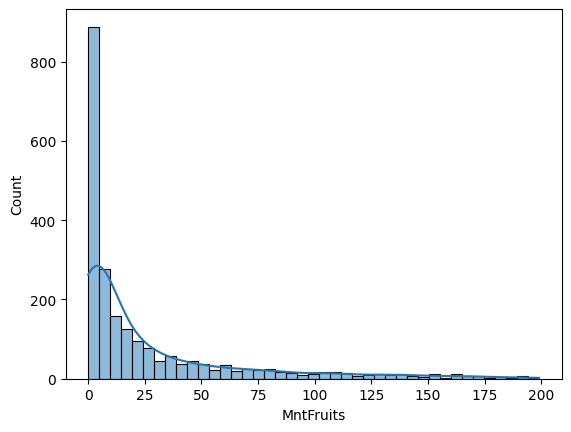

In [ ]:
sns.histplot(superstore_data['MntFruits'], kde = True)

The exponential distribution will look good on this data.

In [ ]:
fruits_dist = stats.expon.fit(superstore_data['MntFruits'])
print(f"The parameters are {fruits_dist}")

The parameters are (0.0, 26.238569488456314)


In [ ]:
print(f"The expected expenditure on fruits is {round(fruits_dist[1], 2)}")

The expected expenditure on fruits is 26.24


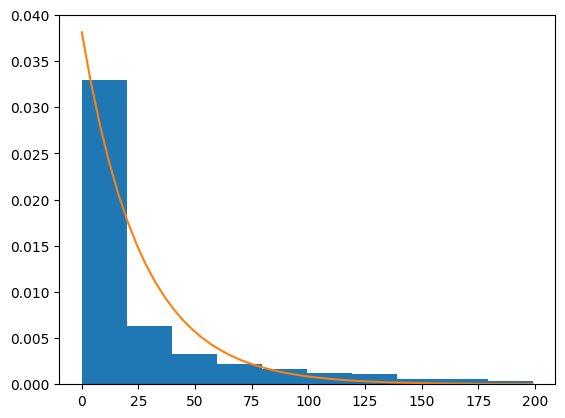

In [ ]:
x = np.linspace(min(superstore_data['MntFruits']), max(superstore_data['MntFruits']))
plt.hist(superstore_data['MntFruits'], bins = 10, density = True)
plt.plot(x, stats.expon.pdf(x, *fruits_dist))
plt.show()

###*MntMeatProducts*

The amount spent on meat products.

<Axes: xlabel='MntMeatProducts', ylabel='Count'>

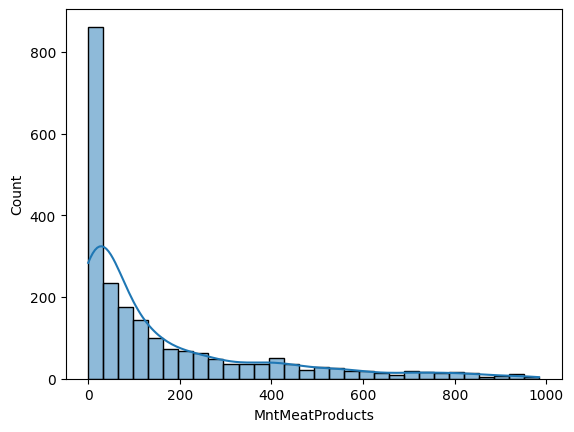

In [ ]:
sns.histplot(superstore_data['MntMeatProducts'], kde = True)

Exponential distribution will be perfect.

In [ ]:
meat_dist = stats.expon.fit(superstore_data['MntMeatProducts'])
print(f"The parameters are {meat_dist}")

The parameters are (0.0, 163.7659574468085)


In [ ]:
print(f"The expected expenditure on meat products is {round(meat_dist[1], 2)}")

The expected expenditure on meat products is 163.77


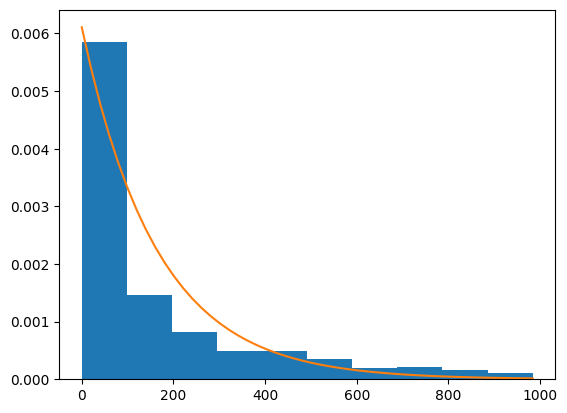

In [ ]:
x = np.linspace(min(superstore_data['MntMeatProducts']), max(superstore_data['MntMeatProducts']))
plt.hist(superstore_data['MntMeatProducts'], bins = 10, density = True)
plt.plot(x, stats.expon.pdf(x, *meat_dist))
plt.show()

###*MntFishProducts*

The amount spent on fish products.

<Axes: xlabel='MntFishProducts', ylabel='Count'>

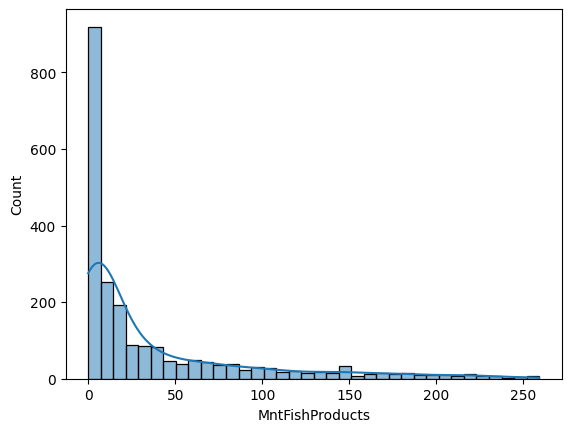

In [ ]:
sns.histplot(superstore_data['MntFishProducts'], kde = True)

The exponential distribution looks like a perfect fit.

In [ ]:
fish_dist = stats.expon.fit(superstore_data['MntFishProducts'])
print(f"The parameters are {fish_dist}")

The parameters are (0.0, 37.660932548664555)


In [ ]:
print(f"The expected expenditure on fish products is {round(fish_dist[1], 2)}")

The expected expenditure on fish products is 37.66


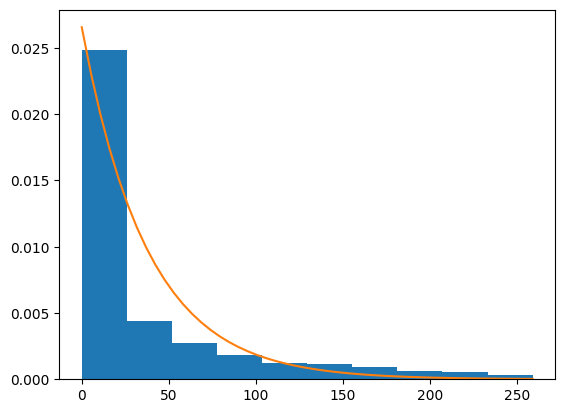

In [ ]:
x = np.linspace(min(superstore_data['MntFishProducts']), max(superstore_data['MntFishProducts']))
plt.hist(superstore_data['MntFishProducts'], bins = 10, density = True)
plt.plot(x, stats.expon.pdf(x, *fish_dist))
plt.show()

###*MntSweetProducts*

The amount spent on sweet products.

<Axes: xlabel='MntSweetProducts', ylabel='Count'>

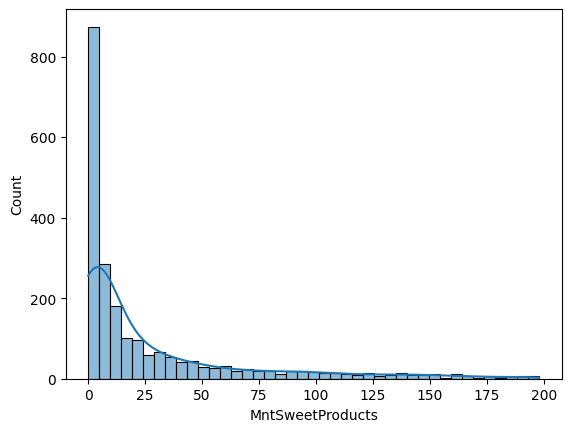

In [ ]:
sns.histplot(superstore_data['MntSweetProducts'], kde = True)

The exponential distribution seems like a perfect fit.

In [ ]:
sweet_dist = stats.expon.fit(superstore_data['MntSweetProducts'])
print(f"The parameters are {sweet_dist}")

The parameters are (0.0, 26.852874603893163)


In [ ]:
print(f"The expected expenditure on sweet products is {round(sweet_dist[1], 2)}")

The expected expenditure on sweet products is 26.85


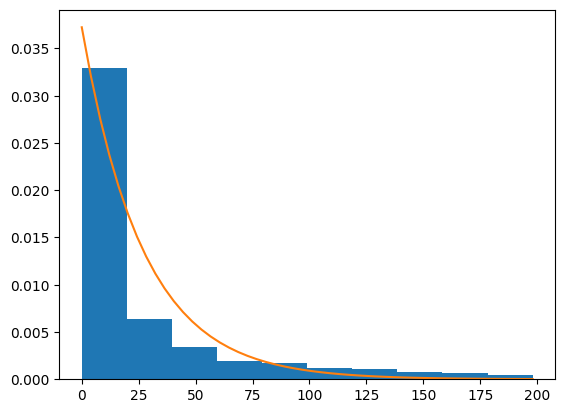

In [ ]:
x = np.linspace(min(superstore_data['MntSweetProducts']), max(superstore_data['MntSweetProducts']))
plt.hist(superstore_data['MntSweetProducts'], bins = 10, density = True)
plt.plot(x, stats.expon.pdf(x, *sweet_dist))
plt.show()

###*NumDealsPurchases*

Number of purchases made with discount.

<Axes: xlabel='NumDealsPurchases', ylabel='count'>

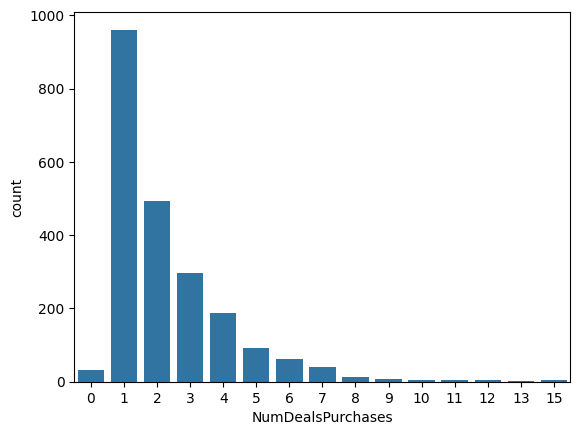

In [ ]:
sns.countplot(x = superstore_data['NumDealsPurchases'])

Since this is a discrete varible. We will be using discrete probability distributions. The poisson distribution looks fit for this.

In [ ]:
deals_purchase_mean = superstore_data['NumDealsPurchases'].mean()
print(f"The parameter of poisson distribution is {deals_purchase_mean}")

The parameter of poisson distribution is 2.326392032593934


In [ ]:
print(f"The expected number of deals purchases from a person is {round(deals_purchase_mean, 0)}")

The expected number of deals purchases from a person is 2.0


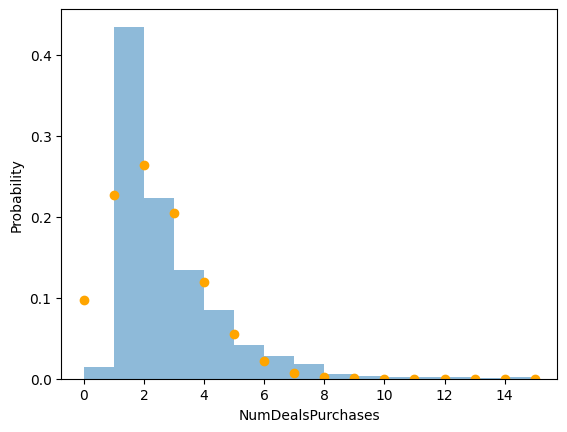

In [ ]:
x = range(min(superstore_data['NumDealsPurchases']), max(superstore_data['NumDealsPurchases'] + 1))
plt.xlabel('NumDealsPurchases')
plt.ylabel('Probability')
plt.hist(superstore_data['NumDealsPurchases'], bins = max(superstore_data['NumDealsPurchases']), density = True, alpha = 0.5)
plt.scatter(x, stats.poisson.pmf(x, deals_purchase_mean), color = 'orange')
plt.show()

### *NumCatalogPurchases*

Number of purchases made using catalog (buying goods to be shipped through the mail)

<Axes: xlabel='NumCatalogPurchases', ylabel='count'>

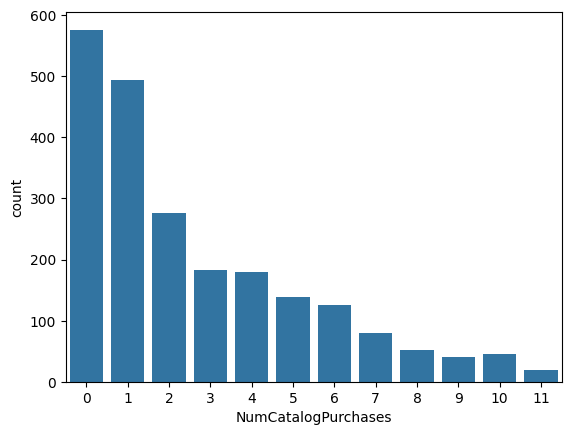

In [ ]:
sns.countplot(x = superstore_data['NumCatalogPurchases'])

Poisson distribution is perfect for this.

In [ ]:
catlog_purchases_mean = superstore_data['NumCatalogPurchases'].mean()
print(f"The parameter of poisson distribution is {catlog_purchases_mean}")

The parameter of poisson distribution is 2.6066093254866454


In [ ]:
print(f"The expected number of catalog purchases from a person is {round(catlog_purchases_mean, 0)}")

The expected number of catalog purchases from a person is 3.0


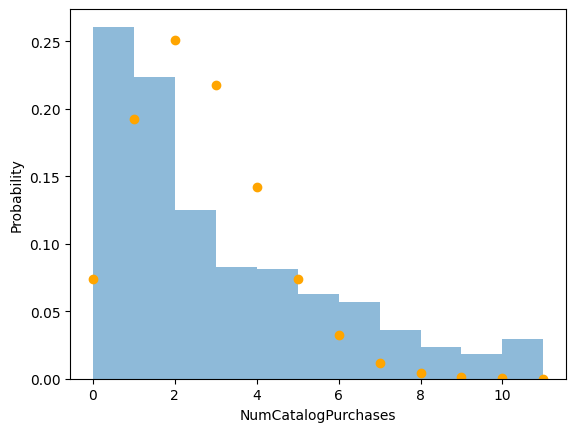

In [ ]:
x = range(min(superstore_data['NumCatalogPurchases']), max(superstore_data['NumCatalogPurchases'] + 1))
plt.xlabel('NumCatalogPurchases')
plt.ylabel('Probability')
plt.hist(superstore_data['NumCatalogPurchases'], bins = max(superstore_data['NumCatalogPurchases']), density = True, alpha = 0.5)
plt.scatter(x, stats.poisson.pmf(x, catlog_purchases_mean), color = 'orange')
plt.show()

### *NumStorePurchases*

Number of purchases made directly in stores

<Axes: xlabel='NumStorePurchases', ylabel='count'>

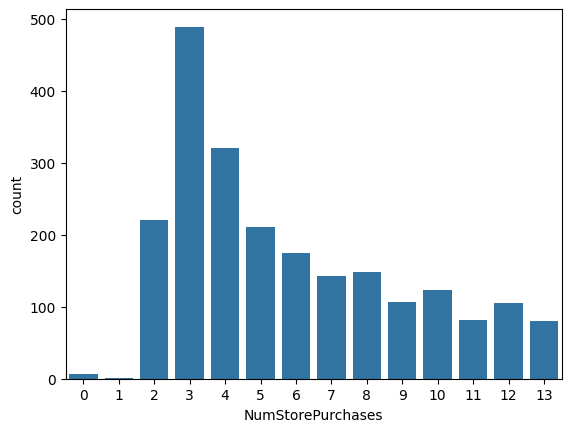

In [ ]:
sns.countplot(x = superstore_data['NumStorePurchases'])

Poisson distribution looks fit for this.

In [ ]:
store_purchases_mean = superstore_data['NumStorePurchases'].mean()
print(f"The parameter of poisson distribution is {store_purchases_mean}")

The parameter of poisson distribution is 5.816659121774559


In [ ]:
print(f"The expected number of store purchases from a person is {round(store_purchases_mean, 0)}")

The expected number of store purchases from a person is 6.0


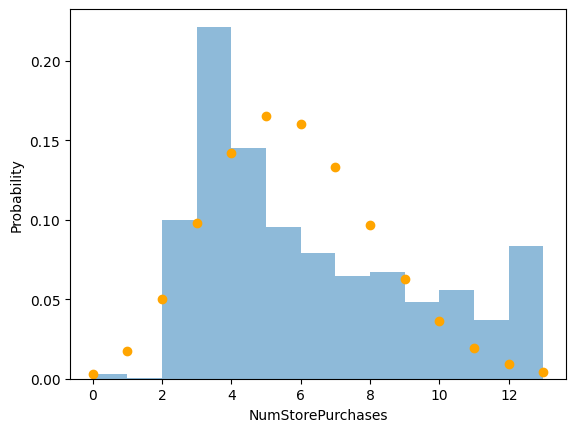

In [ ]:
x = range(min(superstore_data['NumStorePurchases']), max(superstore_data['NumStorePurchases'] + 1))
plt.xlabel('NumStorePurchases')
plt.ylabel('Probability')
plt.hist(superstore_data['NumStorePurchases'], bins = max(superstore_data['NumStorePurchases']), density = True, alpha = 0.5)
plt.scatter(x, stats.poisson.pmf(x, store_purchases_mean), color = 'orange')
plt.show()

### *NumWebPurchases*

Number of purchases made through the company's website

<Axes: xlabel='NumWebPurchases', ylabel='count'>

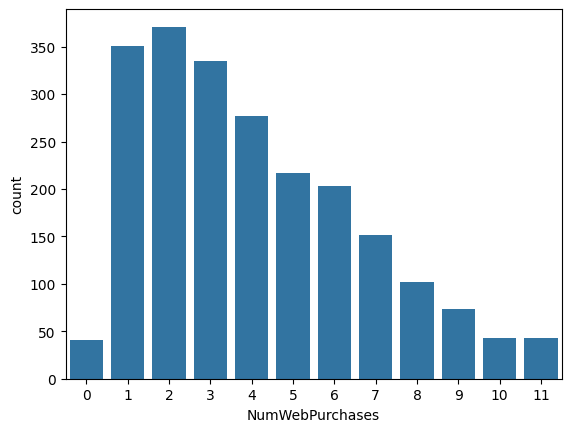

In [ ]:
sns.countplot(x = superstore_data['NumWebPurchases'])

Poisson distribution looks fit for this.

In [ ]:
web_purchases_mean = superstore_data['NumWebPurchases'].mean()
print(f"The parameter of poisson distribution is {web_purchases_mean}")

The parameter of poisson distribution is 4.055228610230873


In [ ]:
print(f"The expected number of web purchases from a person is {round(web_purchases_mean, 0)}")

The expected number of web purchases from a person is 4.0


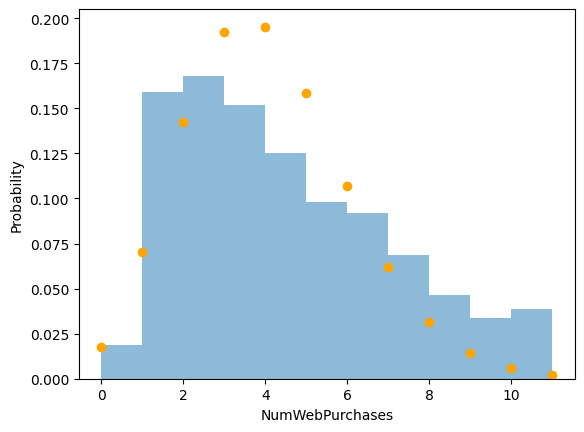

In [ ]:
x = range(min(superstore_data['NumWebPurchases']), max(superstore_data['NumWebPurchases'] + 1))
plt.xlabel('NumWebPurchases')
plt.ylabel('Probability')
plt.hist(superstore_data['NumWebPurchases'], bins = max(superstore_data['NumWebPurchases']), density = True, alpha = 0.5)
plt.scatter(x, stats.poisson.pmf(x, web_purchases_mean), color = 'orange')
plt.show()

### *NumWebVisitsMonth*

Number of visits to company's website in the last month

<Axes: xlabel='NumWebVisitsMonth', ylabel='count'>

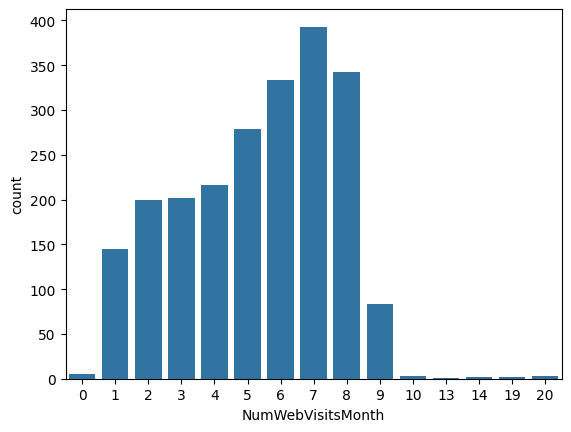

In [ ]:
sns.countplot(x = superstore_data['NumWebVisitsMonth'])

Poisson distribution looks fit for this.

In [ ]:
web_visits_month_mean = superstore_data['NumWebVisitsMonth'].mean()
print(f"The parameter of poisson distribution is {web_visits_month_mean}")

The parameter of poisson distribution is 5.34857401539158


In [ ]:
print(f"The expected number of web visits per month from a person is {round(web_visits_month_mean, 0)}")

The expected number of web visits per month from a person is 5.0


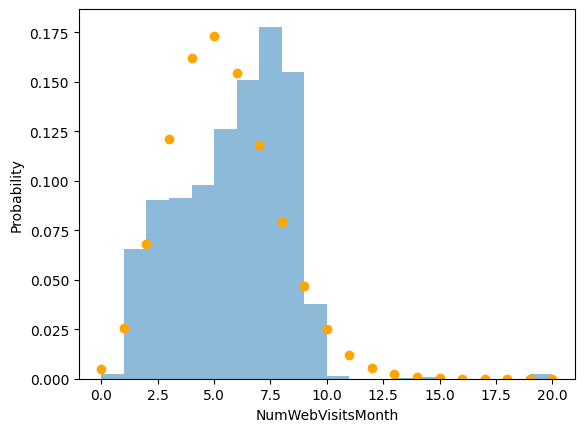

In [ ]:
x = range(min(superstore_data['NumWebVisitsMonth']), max(superstore_data['NumWebVisitsMonth'] + 1))
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Probability')
plt.hist(superstore_data['NumWebVisitsMonth'], bins = max(superstore_data['NumWebVisitsMonth']), density = True, alpha = 0.5)
plt.scatter(x, stats.poisson.pmf(x, web_visits_month_mean), color = 'orange')
plt.show()

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

In [ ]:
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2209 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2209 non-null   int64         
 1   Year_Birth           2209 non-null   int64         
 2   Education            2209 non-null   object        
 3   Marital_Status       2209 non-null   object        
 4   Income               2209 non-null   int64         
 5   Kidhome              2209 non-null   int64         
 6   Teenhome             2209 non-null   int64         
 7   Dt_Customer          2209 non-null   datetime64[ns]
 8   Recency              2209 non-null   int64         
 9   MntWines             2209 non-null   int64         
 10  MntFruits            2209 non-null   int64         
 11  MntMeatProducts      2209 non-null   int64         
 12  MntFishProducts      2209 non-null   int64         
 13  MntSweetProducts     2209 non-null   i

Variables that indicate customer characteristics -
* Education
* Income
* Age(it is a better derived variable from Year_Birth that represents that characteristics of the customer that is relevant to us, as we are not taking into consideration the generation of a person)
* relation_period(it is a better derived variable from Dt_Customer)
* Marital_Status
* no_of_children(I will be replacing Kidhome and Teenhome with no_of_children as they both variables have less variation than no_of_children)

Varibles that indicate customer behaviour -
* MntWines
* MntFruits
* MntMeatProducts
* MntFishProducts
* MntSweetProducts
* MntGoldProds
* NumDealsPurchases
* NumWebPurchases
* NumCatalogPurchases
* NumStorePurchases

Variables that indicate customer status -
* Recency
* Response
* Complain
* NumWebVisitsMonth

Variables that indicate customer spending habits -
* MntWines
* MntFruits
* MntMeatProducts
* MntFishProducts
* MntSweetProducts
* MntGoldProds

Id denotes a customer instance uniquely.(Unique Identifier)

Let us make a variable denoting the total amount spent on shopping. We will do comparision by this.

In [ ]:
superstore_data['MntShopping'] = superstore_data['MntWines'] + superstore_data['MntFruits'] + superstore_data['MntMeatProducts'] + superstore_data['MntFishProducts'] + superstore_data['MntSweetProducts'] + superstore_data['MntGoldProds']

### Exploration of Relationships between variables

<Axes: ylabel='MntShopping'>

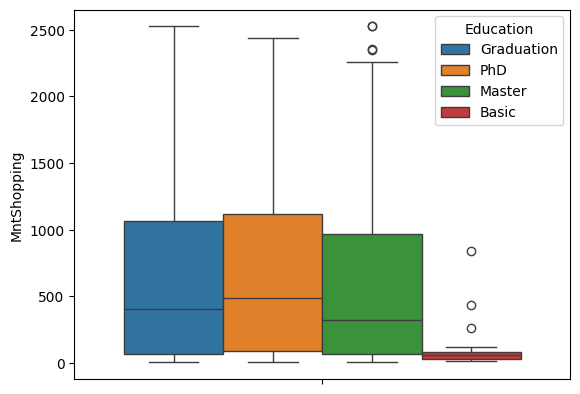

In [ ]:
sns.boxplot(y = superstore_data['MntShopping'], hue = superstore_data['Education'])

People with basic education only tend to spend less. It may be that they are not high income.

<Axes: xlabel='Income', ylabel='MntShopping'>

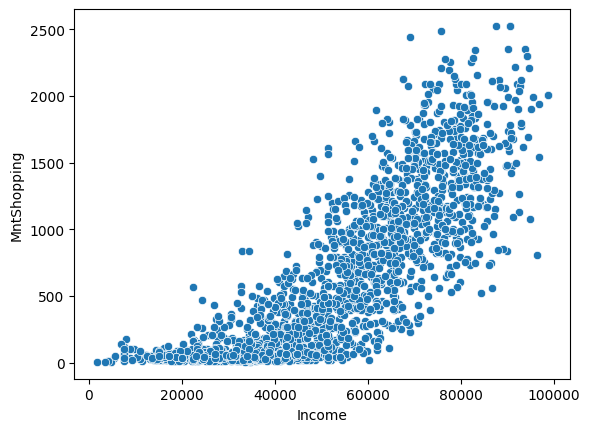

In [ ]:
sns.scatterplot(y = superstore_data['MntShopping'], x = superstore_data['Income'])

This is a clear increasing trend in total amount spent and income.

<Axes: xlabel='Age', ylabel='MntShopping'>

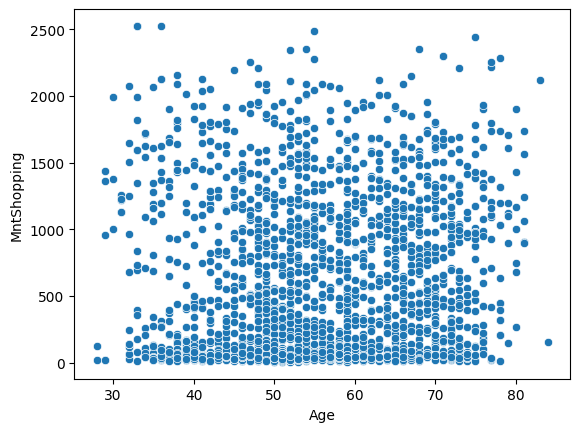

In [ ]:
sns.scatterplot(y = superstore_data['MntShopping'], x = superstore_data['Age'])

There is no clear emerging trend between total amount spent and age.

<Axes: xlabel='relation_period', ylabel='MntShopping'>

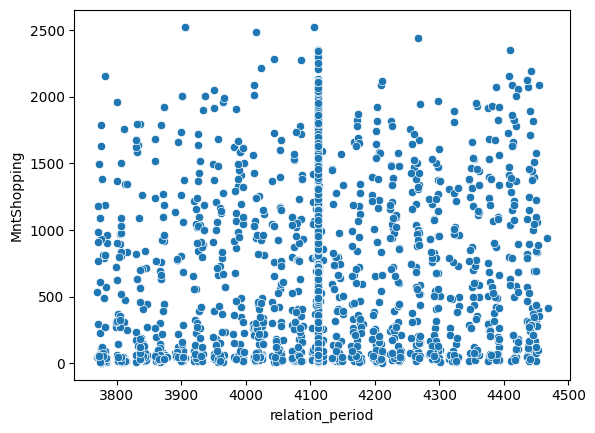

In [ ]:
sns.scatterplot(y = superstore_data['MntShopping'], x = superstore_data['relation_period'])

Again there is no clear trend between total amount spent and relation period.

<Axes: ylabel='MntShopping'>

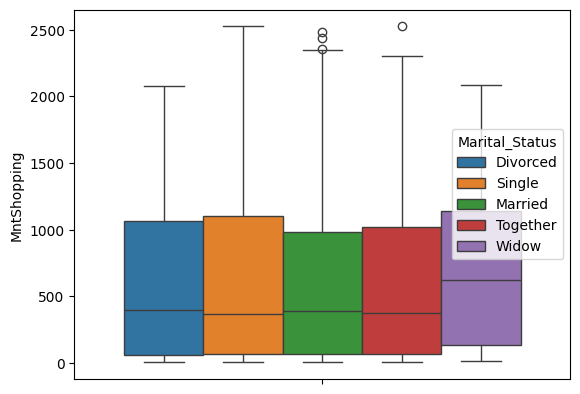

In [ ]:
sns.boxplot(y = superstore_data['MntShopping'], hue = superstore_data['Marital_Status'])

There doesn't seem to be having big differences in total spending with respect to marital status.

<Axes: ylabel='MntShopping'>

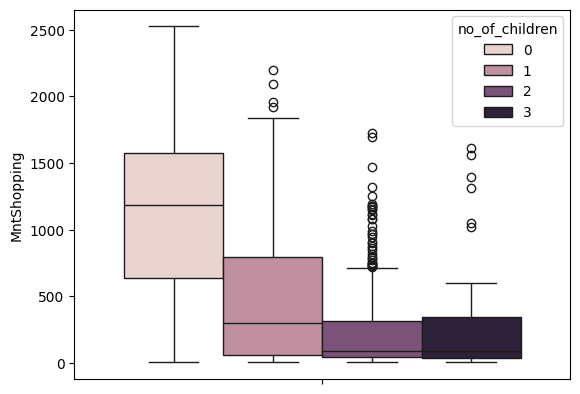

In [ ]:
sns.boxplot(y = superstore_data['MntShopping'], hue = superstore_data['no_of_children'])

People with no child are the biggest spenders followed by people with 1 child. People who have more child spend least and are similar in thier spending habits. It means people with 0 or 1 child have less financial burden that's why they are able to spend so much.

Let us make a variable denoting total number of purchases. We will be using this in comparision instead of individual purchase variables.

In [ ]:
superstore_data['NumPurchases'] = superstore_data['NumDealsPurchases'] + superstore_data['NumWebPurchases'] + superstore_data['NumCatalogPurchases'] + superstore_data['NumStorePurchases']

<Axes: xlabel='NumPurchases', ylabel='MntShopping'>

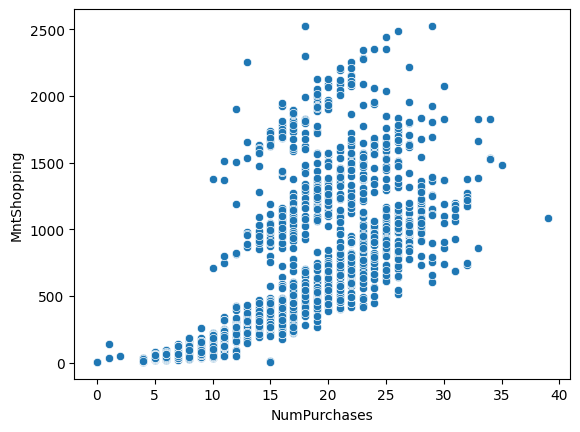

In [ ]:
sns.scatterplot(y = superstore_data['MntShopping'], x = superstore_data['NumPurchases'])

**There is a positive correlation between total amount spent and number of purchases. We can take only one variable out of this in clustering(For segmentation).**

In [ ]:
corr = superstore_data.corr(numeric_only = True)

In [ ]:
corr['MntShopping']['NumPurchases']

0.7608374532314902

**And as guessed, MntShopping and NumPurchases have a strong positive correlation.**

In [ ]:
corr['NumWebPurchases']['NumWebVisitsMonth']

-0.040512264697840895

In [ ]:
corr['NumPurchases']['NumWebVisitsMonth']

-0.31035933108651725

**NumWebVisitsMonth weakly correlates negatively with NumPurchases and even with NumWebPurchases. This is problematic and should be looked into. This correlation should be positive and better if strong also.**

In [ ]:
corr['Income']['MntShopping']

0.8284581658998996

**There is a positive and very strong correlation between Income and MntShopping. So in clustering(Segmentation), we will only take one of the variables out of them.**

<Axes: >

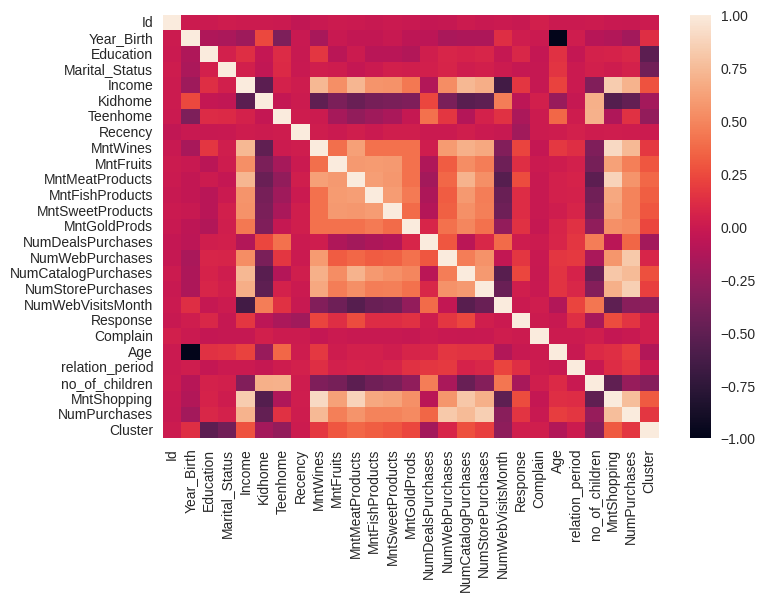

In [ ]:
sns.heatmap(corr)

### Customer Segmentation

We have to segment customers based on their characteristics and behaviours. For this segmentation, I will take variables -
* Education
* Income
* Marital_Status
* no_of_children

I will not be using relation_period as it doesn't have much variance and is quite peaked with most of the values centered around median. Also it shows no trend with total amount spent.

I will be also not using Age as it doesn't show a clear trend with total spending.

I will also be not using MntShopping as it has a positive and strong correlation with Income.

#### Categorical Variable Encoding

First Education and Marital_Status are categorical variables and we need to encode them.

In [ ]:
superstore_data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

In [ ]:
def encode_education(x):
    if x == 'Basic':
        return 0
    elif x == 'Graduation':
        return 1
    elif x == 'Master':
        return 2
    elif x == 'PhD':
        return 3

The Education encoding is as follows -

0 - Basic

1 - Graduation

2 - Master

3 - PhD

In [ ]:
superstore_data['Education'] = superstore_data['Education'].apply(encode_education)

In [ ]:
superstore_data['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

In [ ]:
def encode_Marital_Status(x):
    if x == 'Single':
        return 1
    elif x == 'Together':
        return 2
    elif x == 'Married':
        return 3
    elif x == 'Divorced':
        return 4
    elif x == 'Widow':
        return 5

The encoding for Marital_Status is as follows -

1 - Single

2 - Together

3 - Married

4 - Divorced

5 - Widow

In [ ]:
superstore_data['Marital_Status'] = superstore_data['Marital_Status'].apply(encode_Marital_Status)

In [ ]:
segmentation_data = superstore_data[['Education', 'Income', 'Marital_Status', 'no_of_children']]

#### Normalization

Now it is time for Normalization and standardization. I will do Min-Max Scaling(Normalization).

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
segmentation_data = pd.DataFrame(scaler.fit_transform(segmentation_data), columns=segmentation_data.columns)

In [ ]:
segmentation_data.head()

,Education,Income,Marital_Status,no_of_children
0,0.333333,0.856338,0.75,0.000000
1,0.333333,0.570456,0.00,0.000000
2,0.333333,0.675312,0.50,0.333333
3,0.333333,0.316795,0.25,0.666667
4,0.333333,0.203448,0.00,0.333333


#### Finding optimal number of clusters

In [ ]:
from sklearn.cluster import KMeans

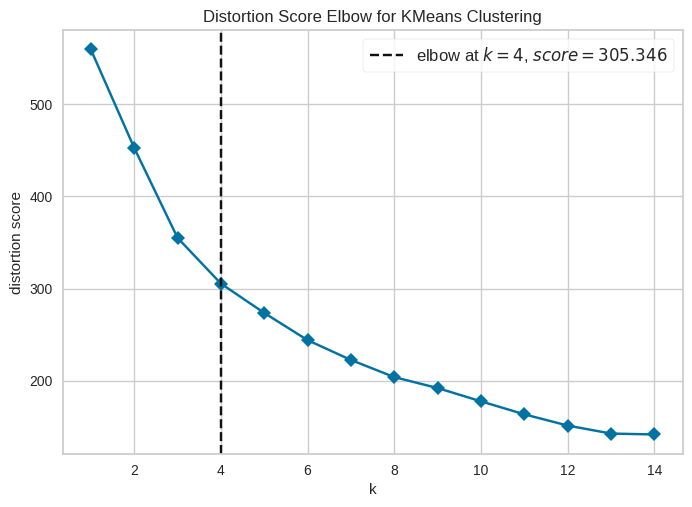

In [ ]:
# elbow method to find out the best k
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(segmentation_data)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(segmentation_data)
visualizer.poof()
plt.show()

####Clustering

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 1000)
kmeans.fit(segmentation_data)

KMeans(max_iter=1000, n_clusters=4)

In [ ]:
superstore_data['Cluster'] = kmeans.labels_

In [ ]:
superstore_data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,relation_period,no_of_children,MntShopping,NumPurchases,Cluster
0,1826,1970,1,4,84835,0,0,2014-06-16,0,189,...,6,1,1,0,54,3782,0,1190,15,3
1,1,1961,1,1,57091,0,0,2014-06-15,0,464,...,7,5,1,0,63,3783,0,577,18,3
2,10476,1958,1,3,67267,0,1,2014-05-13,0,134,...,5,2,0,0,66,3816,1,251,11,3
3,1386,1967,1,2,32474,1,1,2013-07-21,0,10,...,2,7,0,0,57,4112,2,11,4,2
4,5371,1989,1,1,21474,1,0,2013-07-21,0,6,...,2,7,1,0,35,4112,1,91,8,2


In [ ]:
cluster_data = round(superstore_data.drop(columns = ['Id', 'Year_Birth', 'Dt_Customer', 'Teenhome', 'Kidhome'], inplace = False).groupby('Cluster').mean(), 2)

In [ ]:
cluster_data[['Education', 'Income', 'Marital_Status', 'no_of_children']]

,Education,Income,Marital_Status,no_of_children
Cluster,,,,
0,1.79,51803.44,4.27,1.03
1,2.51,49236.65,2.24,1.12
2,0.93,39140.39,2.16,1.23
3,1.25,73940.81,2.26,0.20


In [ ]:
superstore_data.loc[superstore_data['Cluster'] == 0].Education.value_counts()

,count
Education,
1,133
2,76
3,74
0,1


In [ ]:
superstore_data.loc[superstore_data['Cluster'] == 1].Education.value_counts()

,count
Education,
3,399
2,377


In [ ]:
superstore_data.loc[superstore_data['Cluster'] == 2].Education.value_counts()

,count
Education,
1,641
0,53
2,1


In [ ]:
superstore_data.loc[superstore_data['Cluster'] == 3].Education.value_counts()

,count
Education,
1,341
2,113


In [ ]:
superstore_data.loc[superstore_data['Cluster'] == 0].Marital_Status.value_counts()

,count
Marital_Status,
4,208
5,76


In [ ]:
superstore_data.loc[superstore_data['Cluster'] == 1].Marital_Status.value_counts()

,count
Marital_Status,
3,358
2,245
1,173


In [ ]:
superstore_data.loc[superstore_data['Cluster'] == 2].Marital_Status.value_counts()

,count
Marital_Status,
3,300
2,200
1,193
4,2


In [ ]:
superstore_data.loc[superstore_data['Cluster'] == 3].Marital_Status.value_counts()

,count
Marital_Status,
3,196
2,125
1,115
4,18


In [ ]:
superstore_data.loc[superstore_data['Cluster'] == 0].no_of_children.value_counts()

,count
no_of_children,
1,151
2,65
0,64
3,4


In [ ]:
superstore_data.loc[superstore_data['Cluster'] == 1].no_of_children.value_counts()

,count
no_of_children,
1,432
2,178
0,139
3,27


In [ ]:
superstore_data.loc[superstore_data['Cluster'] == 2].no_of_children.value_counts()

,count
no_of_children,
1,442
2,175
0,56
3,22


In [ ]:
superstore_data.loc[superstore_data['Cluster'] == 3].no_of_children.value_counts()

,count
no_of_children,
0,363
1,91


**Definition of Clusters**

**Cluster 0 - Widowed or Divorced People with medium income having 0-2 children and education levels above Basic.**

**Cluster 1 - Mostly Coupled People or Singles with medium income having 0-2 children and education levels above Graduation.**

**Cluster 2 - Mostly Coupled People or Singles with low income having 1-2 children and with education levels from Basic to Graduation.**

**Cluster 3 - Mostly Coupled People or Singles with high income having 0 or 1 child and with education levels from Graduation to Master.**

####Deriving Insights from Clusters

Let us now dwelve into spending habits of clusters.

In [ ]:
cluster_data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntShopping']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntShopping
Cluster,,,,,,,
0,319.56,25.70,143.39,36.06,26.22,45.19,596.13
1,289.73,16.41,114.82,23.29,17.32,31.07,492.65
2,135.55,13.36,61.37,17.67,13.29,33.40,274.65
3,559.19,63.08,416.92,93.83,64.30,78.30,1275.62


**Again the spending strongly correlates positively with income with cluster-2 spending less, cluster-0 and cluster-1 with medium spending and cluster-3 with highest spending. And also no_children correlates with spending less and saving more.**

Let us see a clear picture of spending habits through percentages.

In [ ]:
cluster_data['percent_wines'] = round(cluster_data['MntWines'] / cluster_data['MntShopping'] * 100, 2)
cluster_data['percent_fruits'] = round(cluster_data['MntFruits'] / cluster_data['MntShopping'] * 100, 2)
cluster_data['percent_meat'] = round(cluster_data['MntMeatProducts'] / cluster_data['MntShopping'] * 100, 2)
cluster_data['percent_fish'] = round(cluster_data['MntFishProducts'] / cluster_data['MntShopping'] * 100, 2)
cluster_data['percent_sweet'] = round(cluster_data['MntSweetProducts'] / cluster_data['MntShopping'] * 100, 2)
cluster_data['percent_gold'] = round(cluster_data['MntGoldProds'] / cluster_data['MntShopping'] * 100, 2)

cluster_data[['percent_wines', 'percent_fruits', 'percent_meat', 'percent_fish', 'percent_sweet', 'percent_gold']]

,percent_wines,percent_fruits,percent_meat,percent_fish,percent_sweet,percent_gold
Cluster,,,,,,
0,53.61,4.31,24.05,6.05,4.40,7.58
1,58.81,3.33,23.31,4.73,3.52,6.31
2,49.35,4.86,22.34,6.43,4.84,12.16
3,43.84,4.95,32.68,7.36,5.04,6.14


Let us now see the activity stats for clusters.

In [ ]:
cluster_data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumPurchases', 'NumWebVisitsMonth']]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumPurchases,NumWebVisitsMonth
Cluster,,,,,,
0,2.53,4.40,2.65,5.86,15.45,5.56
1,2.53,3.94,2.18,5.51,14.15,5.68
2,2.71,3.34,1.24,4.50,11.79,6.42
3,1.26,5.14,5.39,8.34,20.13,3.02


**Again NumPurchases correlates positively with income with cluster-3 having highest number, cluster-0 and cluster-1 having comparable number and cluster-2 having lowest number.**

**Cluster-3 made lowest number of Deal purchases, while other clusters responded better to deals.**

Let us see purchase preferences through percents.

In [ ]:
cluster_data['percent_deals_purchases'] = round(cluster_data['NumDealsPurchases'] / cluster_data['NumPurchases'] * 100, 2)
cluster_data['percent_web_purchases'] = round(cluster_data['NumWebPurchases'] / cluster_data['NumPurchases'] *100, 2)
cluster_data['percent_catalog_purchases'] = round(cluster_data['NumCatalogPurchases'] / cluster_data['NumPurchases'] *100, 2)
cluster_data['percent_store_purchases'] = round(cluster_data['NumStorePurchases'] / cluster_data['NumPurchases'] *100, 2)

cluster_data[['percent_deals_purchases', 'percent_web_purchases', 'percent_catalog_purchases', 'percent_store_purchases']]

,percent_deals_purchases,percent_web_purchases,percent_catalog_purchases,percent_store_purchases
Cluster,,,,
0,16.38,28.48,17.15,37.93
1,17.88,27.84,15.41,38.94
2,22.99,28.33,10.52,38.17
3,6.26,25.53,26.78,41.43


**Store Purchases make up the biggest percent in all clusters with approximately 40%.**

**Web Purchases make up 25-30%.**

**In Catalog purchases, cluster-2 have the lowest number, cluster-0 and cluster-1 have comparable numbers and cluster-3 have the highest number. For Catalog purchases, focussing on cluster-3 is important.**

**Wines are the biggest portion of spending in all clusters at 40-60%. Wines should be targeted to attract all customers.**

**Portion on meat stands at 20-35%. While cluster-0, cluster-1 and cluster-2 spend 20-25%, cluster-3 spends 33% on meat products. Meat products should be targeted at cluster-3.**

**The expenditures on fruits, fish products and sweet products are minor percentages of total expenditure. So, we don't need to consider them that much.**

**Despite low income, portion of gold products for cluster-2 is almost double that of other clusters. And also from buying behaviour, we know that cluster-2 did highest number of deal purchases on average. So, deals on gold products must be provided to cluster-2.**

In [ ]:
cluster_data['Recency']

,Recency
Cluster,
0,49.13
1,48.79
2,49.95
3,48.75


**Recency almost remains constant over clusters.**

In [ ]:
cluster_data['Age']

,Age
Cluster,
0,59.81
1,55.49
2,52.83
3,55.06


**Age almost remains constant over clusters.**

In [ ]:
cluster_data['relation_period']

,relation_period
Cluster,
0,4117.67
1,4103.35
2,4125.80
3,4106.89


**Again customer relation period almost remains constant over clusters.**

In [ ]:
cluster_data['Response']

,Response
Cluster,
0,0.19
1,0.14
2,0.08
3,0.23


**In terms of average offer acceptance rates, the order is:**

**cluster-3 > cluster-0 > cluster-1 > cluster-2**

**In my opinion, in the marketing campaigns, the strategy for cluster-1 people should be worked upon, as they are medium spenders and have second lowest offer acceptance rate.**

In [ ]:
cluster_data['Complain']

,Complain
Cluster,
0,0.00
1,0.01
2,0.02
3,0.01


**cluster-2 have the highest complian rate. Cluster-2 people's requirements and preferences should be studied properly. The target should be to half it.**

**cluster-1 and cluster-3 have half the complain rate, but not too high and can be ignored.**

**cluster-0 have the lowest complain rate of 0, which means our products have satisfied the cluster-0 people perfectly.**

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

***cluster-2 have the highest complian rate. Cluster-2 people's requirements and preferences should be studied properly. The target should be to half it.***

***cluster-1 and cluster-3 have half the complain rate, but not too high and can be ignored.***

***cluster-0 have the lowest complain rate of 0, which means our products have satisfied the cluster-0 people perfectly.***

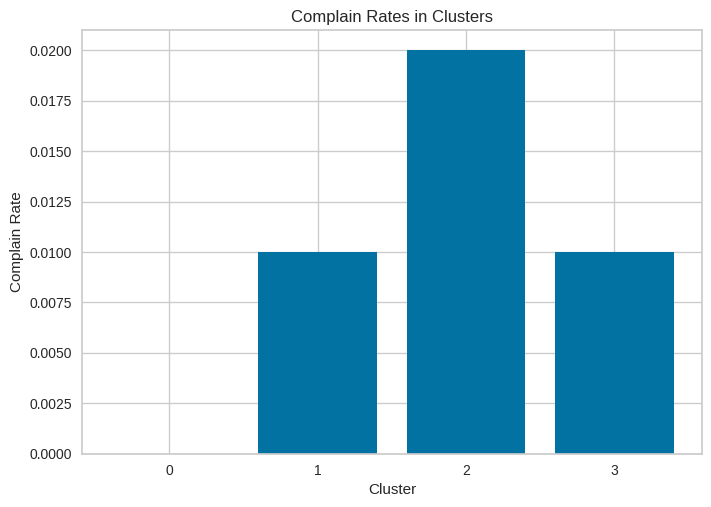

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.bar(cluster_data.index, cluster_data['Complain'])
plt.xlabel('Cluster')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Complain Rate')
plt.title('Complain Rates in Clusters')
plt.show()

***In terms of average offer acceptance rates, the order is:***

***cluster-3 > cluster-0 > cluster-1 > cluster-2***

***In my opinion, in the marketing campaigns, the strategy for cluster-1 people should be worked upon, as they are medium spenders and have second lowest offer acceptance rate.***

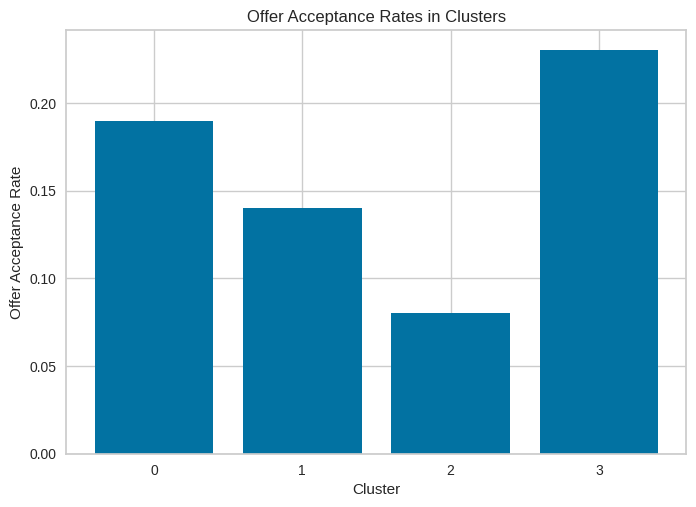

In [ ]:
plt.bar(cluster_data.index, cluster_data['Response'])
plt.xlabel('Cluster')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Offer Acceptance Rate')
plt.title('Offer Acceptance Rates in Clusters')
plt.show()

<Axes: ylabel='MntShopping'>

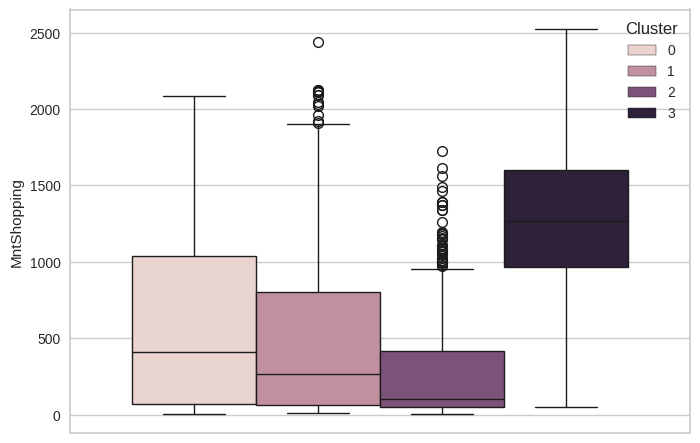

In [ ]:
sns.boxplot(y = superstore_data['MntShopping'], hue = superstore_data['Cluster'])

***Store Purchases make up the biggest percent in all clusters with approximately 40%.***

***Web Purchases make up 25-30%.***


In [ ]:
purchase_sum_data = superstore_data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

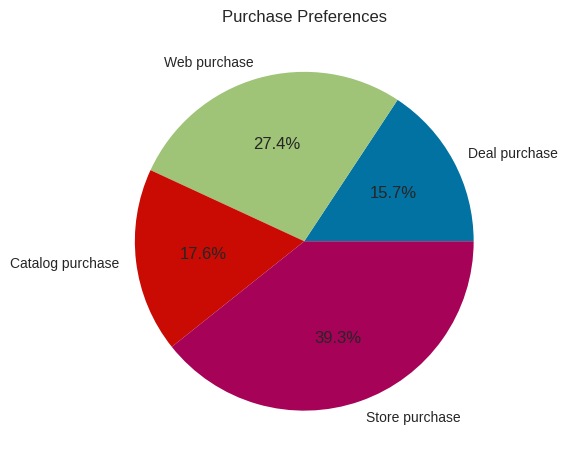

In [ ]:
plt.pie(purchase_sum_data, labels = ['Deal purchase', 'Web purchase', 'Catalog purchase', 'Store purchase'], autopct = '%1.1f%%')
plt.title('Purchase Preferences')
plt.show()

***In Catalog purchases, cluster-2 have the lowest number, cluster-0 and cluster-1 have comparable numbers and cluster-3 have the highest number. For Catalog purchases, focussing on cluster-3 is important.***

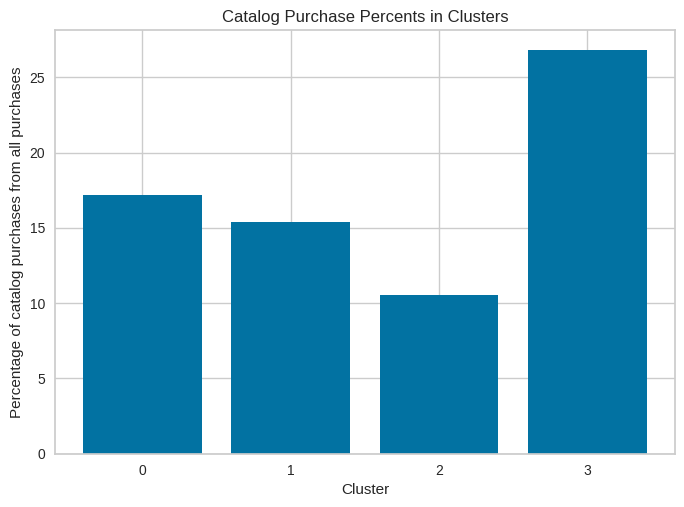

In [ ]:
plt.bar(cluster_data.index, cluster_data['percent_catalog_purchases'])
plt.xlabel('Cluster')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Percentage of catalog purchases from all purchases')
plt.title('Catalog Purchase Percents in Clusters')
plt.show()

***Wines are the biggest portion of spending in all clusters at 40-60%. Wines should be targeted to attract all customers.***

***The expenditures on fruits, fish products and sweet products are minor percentages of total expenditure. So, we don't need to consider them that much.***


In [ ]:
Mnt_sum_data = superstore_data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

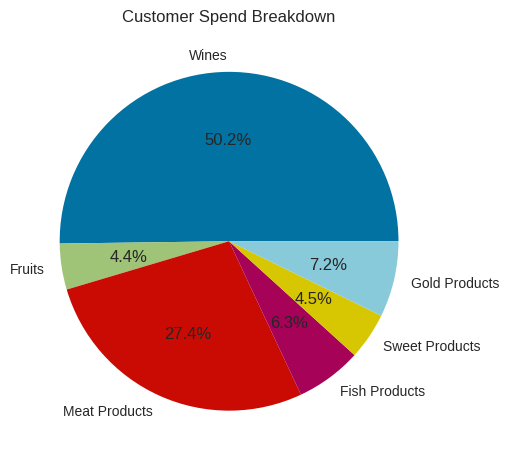

In [ ]:
plt.pie(Mnt_sum_data, labels = ['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products'], autopct = '%1.1f%%')
plt.title('Customer Spend Breakdown')
plt.show()

***Portion on meat stands at 20-35%. While cluster-0, cluster-1 and cluster-2 spend 20-25%, cluster-3 spends 33% on meat products. Meat products should be targeted at cluster-3.***

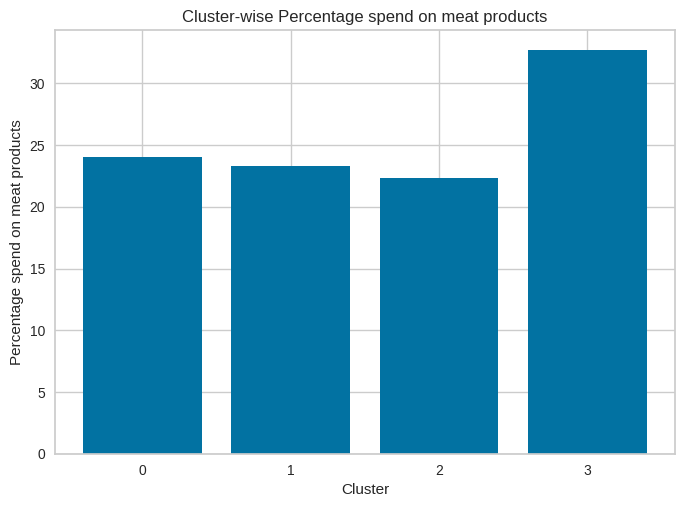

In [ ]:
plt.bar(cluster_data.index, cluster_data['percent_meat'])
plt.xlabel('Cluster')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Percentage spend on meat products')
plt.title('Cluster-wise Percentage spend on meat products')
plt.show()

***Cluster-3 made lowest number of Deal purchases on average, while cluster-2 made the highest no of deal purchases on average.***

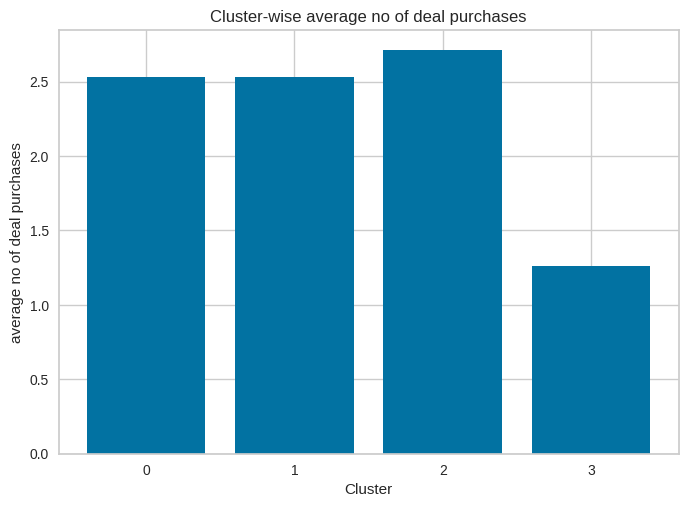

In [ ]:
plt.bar(cluster_data.index, cluster_data['NumDealsPurchases'])
plt.xlabel('Cluster')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('average no of deal purchases')
plt.title('Cluster-wise average no of deal purchases')
plt.show()


***Despite low income, portion of gold products for cluster-2 is almost double that of other clusters. And also from buying behaviour, we know that cluster-2 did highest number of deal purchases on average. So, deals on gold products must be provided to cluster-2.***

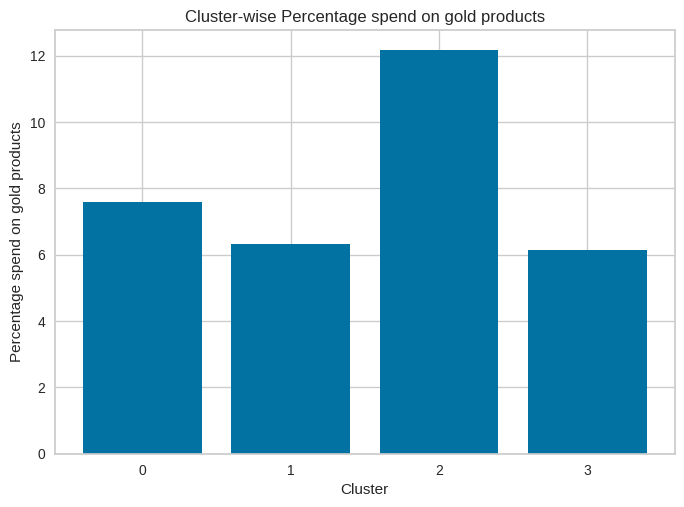

In [ ]:
plt.bar(cluster_data.index, cluster_data['percent_gold'])
plt.xlabel('Cluster')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Percentage spend on gold products')
plt.title('Cluster-wise Percentage spend on gold products')
plt.show()

***Number of purchases correlates positively with income***

<Axes: xlabel='Income', ylabel='NumPurchases'>

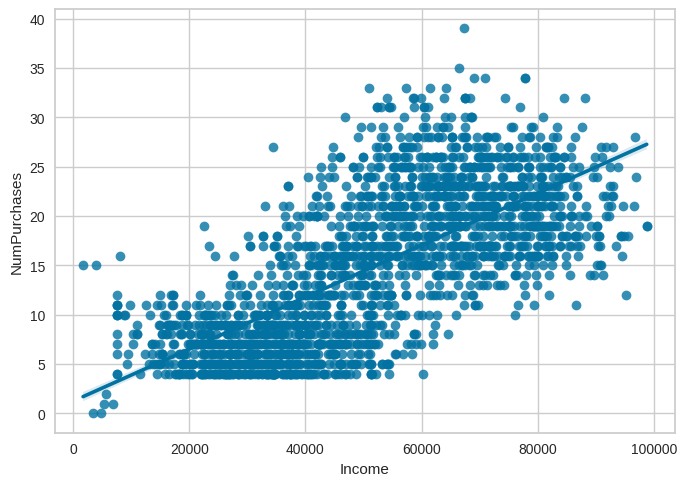

In [ ]:
sns.regplot(x = 'Income', y = 'NumPurchases', data = superstore_data)

Let us put a hue of cluster.

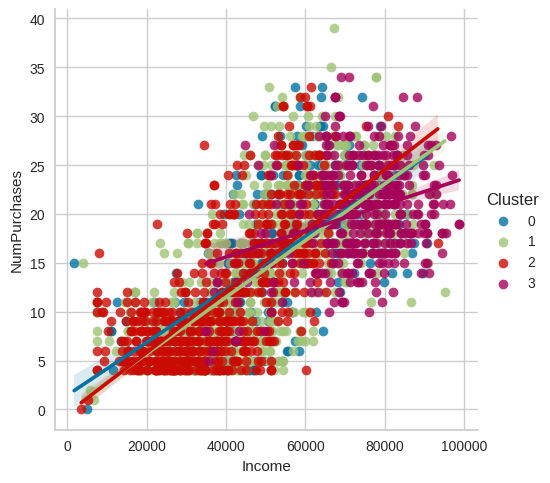

In [ ]:
sns.lmplot(x = 'Income', y = 'NumPurchases', hue = 'Cluster', data = superstore_data)

***Not very big differences in clusters here.***

***Total spending correlates positively with income***

<Axes: xlabel='Income', ylabel='MntShopping'>

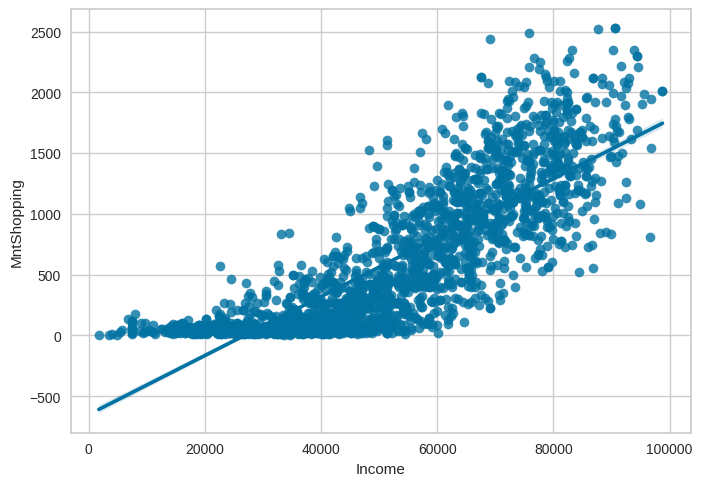

In [ ]:
sns.regplot(x = 'Income', y = 'MntShopping', data = superstore_data)

let us put a hue of cluster.

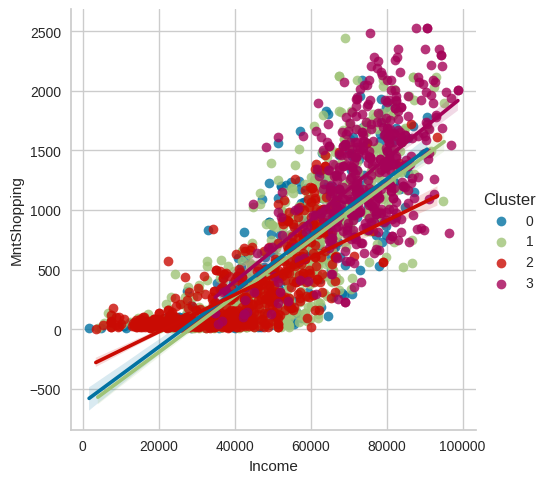

In [ ]:
sns.lmplot(x = 'Income', y = 'MntShopping', hue = 'Cluster', data = superstore_data)

***Not very big difference in clusters.***

***Total spending correlates positively with number of purchases***

<Axes: xlabel='NumPurchases', ylabel='MntShopping'>

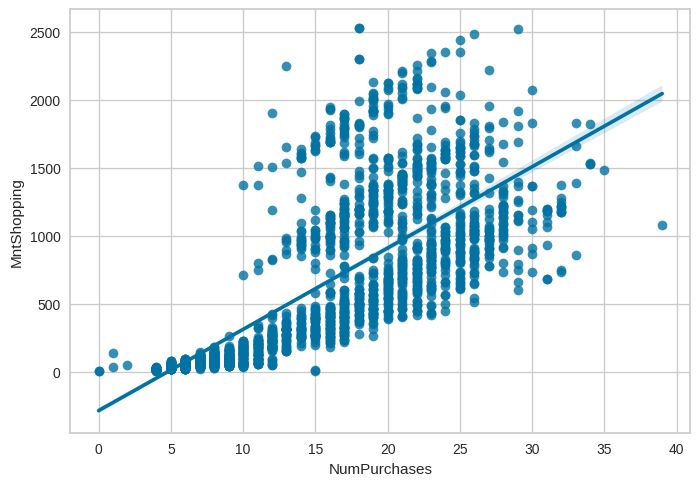

In [ ]:
sns.regplot(x = 'NumPurchases', y = 'MntShopping', data = superstore_data)

Let us put a hue of clusters.

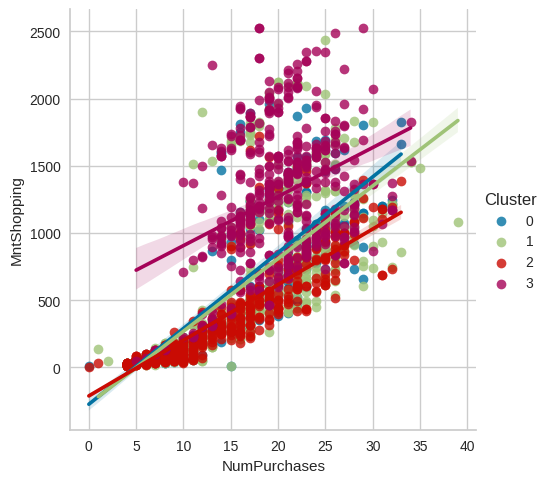

In [ ]:
sns.lmplot(x = 'NumPurchases', y = 'MntShopping', hue = 'Cluster', data = superstore_data)

***We find that per purchase, cluster-0 people spend the highest. We should try to get more cluster-0 people. And also try to market to cluster-0 people so that they make more purchases.***

***NumWebVisitsMonth weakly correlates negatively with NumPurchases and even with NumWebPurchases. This looks problematic. This correlation should be positive and better if strong also. But on further analysis, it is found that this is due to some outlier customers that visit the website many times but buy very rarely. May be they are very choosy or they get timepass from visiting our website.***

<Axes: xlabel='NumWebVisitsMonth', ylabel='NumPurchases'>

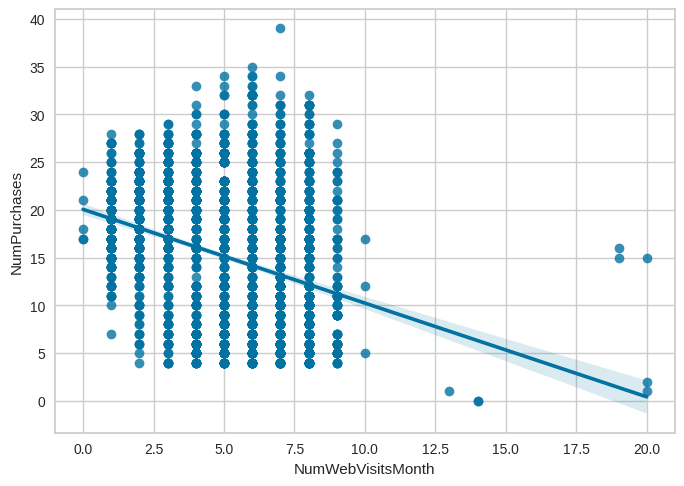

In [ ]:
sns.regplot(x = 'NumWebVisitsMonth', y = 'NumPurchases', data = superstore_data)

<Axes: xlabel='NumWebVisitsMonth', ylabel='NumWebPurchases'>

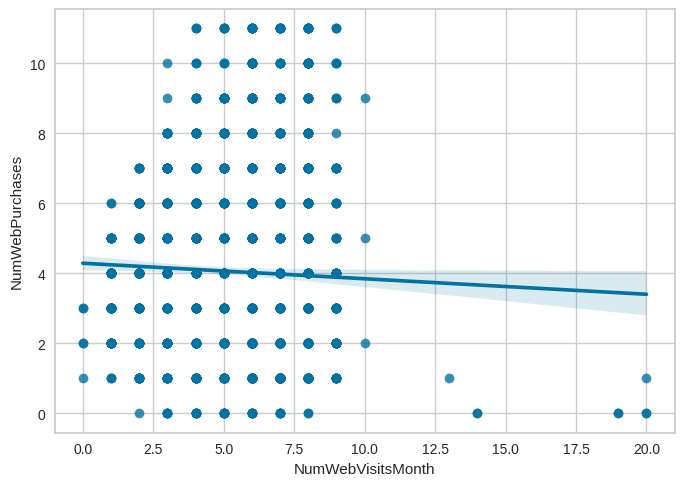

In [ ]:
sns.regplot(x = 'NumWebVisitsMonth', y = 'NumWebPurchases', data = superstore_data)

In [ ]:
superstore_data.loc[superstore_data['NumWebVisitsMonth'] > 10]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,relation_period,no_of_children,MntShopping,NumPurchases,Cluster
299,9303,1976,1,3,5305,0,1,2013-07-30,12,12,...,0,13,0,0,48,4103,1,32,1,2
456,3955,1965,1,4,4861,0,0,2014-06-22,20,2,...,0,14,0,0,59,3776,0,6,0,0
663,9931,1963,3,3,4023,1,1,2014-06-23,29,5,...,0,19,0,0,61,3775,2,9,15,1
1291,11110,1973,1,1,3502,1,0,2013-04-13,56,2,...,0,14,0,0,51,4211,1,5,0,2
1416,10749,1991,1,1,8028,0,0,2012-09-18,62,73,...,0,19,0,0,33,4418,0,178,16,2
1466,6862,1971,1,4,1730,0,0,2014-05-18,65,1,...,0,20,0,0,53,3811,0,8,15,0
1533,5899,1950,3,2,5648,1,1,2014-03-13,68,28,...,0,20,0,0,74,3877,2,49,2,1
1721,4303,1957,3,2,6835,0,1,2013-07-21,76,107,...,1,20,0,0,67,4112,1,137,1,1


In [ ]:
len(superstore_data.loc[superstore_data['NumWebVisitsMonth'] > 10])

8

***There are 8 such outlier persons.***